<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Purpose" data-toc-modified-id="Purpose-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Input" data-toc-modified-id="Input-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Input</a></span></li><li><span><a href="#Output" data-toc-modified-id="Output-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Output</a></span></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Meta" data-toc-modified-id="Meta-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Meta</a></span><ul class="toc-item"><li><span><a href="#Brain-region-info" data-toc-modified-id="Brain-region-info-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Brain region info</a></span></li><li><span><a href="#Cell-Metadata" data-toc-modified-id="Cell-Metadata-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Cell Metadata</a></span></li></ul></li><li><span><a href="#Plot" data-toc-modified-id="Plot-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plot</a></span><ul class="toc-item"><li><span><a href="#UMAP" data-toc-modified-id="UMAP-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>UMAP</a></span></li><li><span><a href="#tSNE" data-toc-modified-id="tSNE-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>tSNE</a></span></li></ul></li></ul></div>

# Plot Brain Regions

## Purpose
- Plot brain region distribution on coords and clusters

## Input
- all coords and clustering results, cell meta

## Output
- Brain region plots

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from cemba_data.plot import *

In [3]:
result_dir = pathlib.Path('BrainRegion')
result_dir.mkdir(exist_ok=True)
fig_dir = pathlib.Path('fig/brain_region')
fig_dir.mkdir(exist_ok=True, parents=True)

## Parameters

In [4]:
cell_meta_path = '/home/hanliu/project/mouse_rostral_brain/'
brain_region_meta_path = '/home/hanliu/project/mouse_rostral_brain/metadata/BrainRegion.txt'
cluster_col_name = 'consensus_cluster_rescued_anno'

s = 1

In [5]:
# Parameters
s = 10


## Meta

### Brain region info

In [6]:
brain_region = pd.read_csv(brain_region_meta_path,
                           sep='\t', index_col='DissectionRegion')
major_region_palette = brain_region.set_index('MajorRegion')['MajorRegionColor'].to_dict()
sub_region_palette = brain_region.set_index('SubRegion')['SubRegionColor'].to_dict()
region_palette = brain_region['DissectionRegionColor'].to_dict()

### Cell Metadata

In [7]:
cell_meta = pd.read_msgpack('cell_tidy_data.final_annotation.msg')
cell_meta['MajorRegion'] = cell_meta['Region'].map(brain_region['MajorRegion'])
cell_meta['SubRegion'] = cell_meta['Region'].map(brain_region['SubRegion'])

## Plot

### UMAP

In [8]:
coords = 'umap'

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


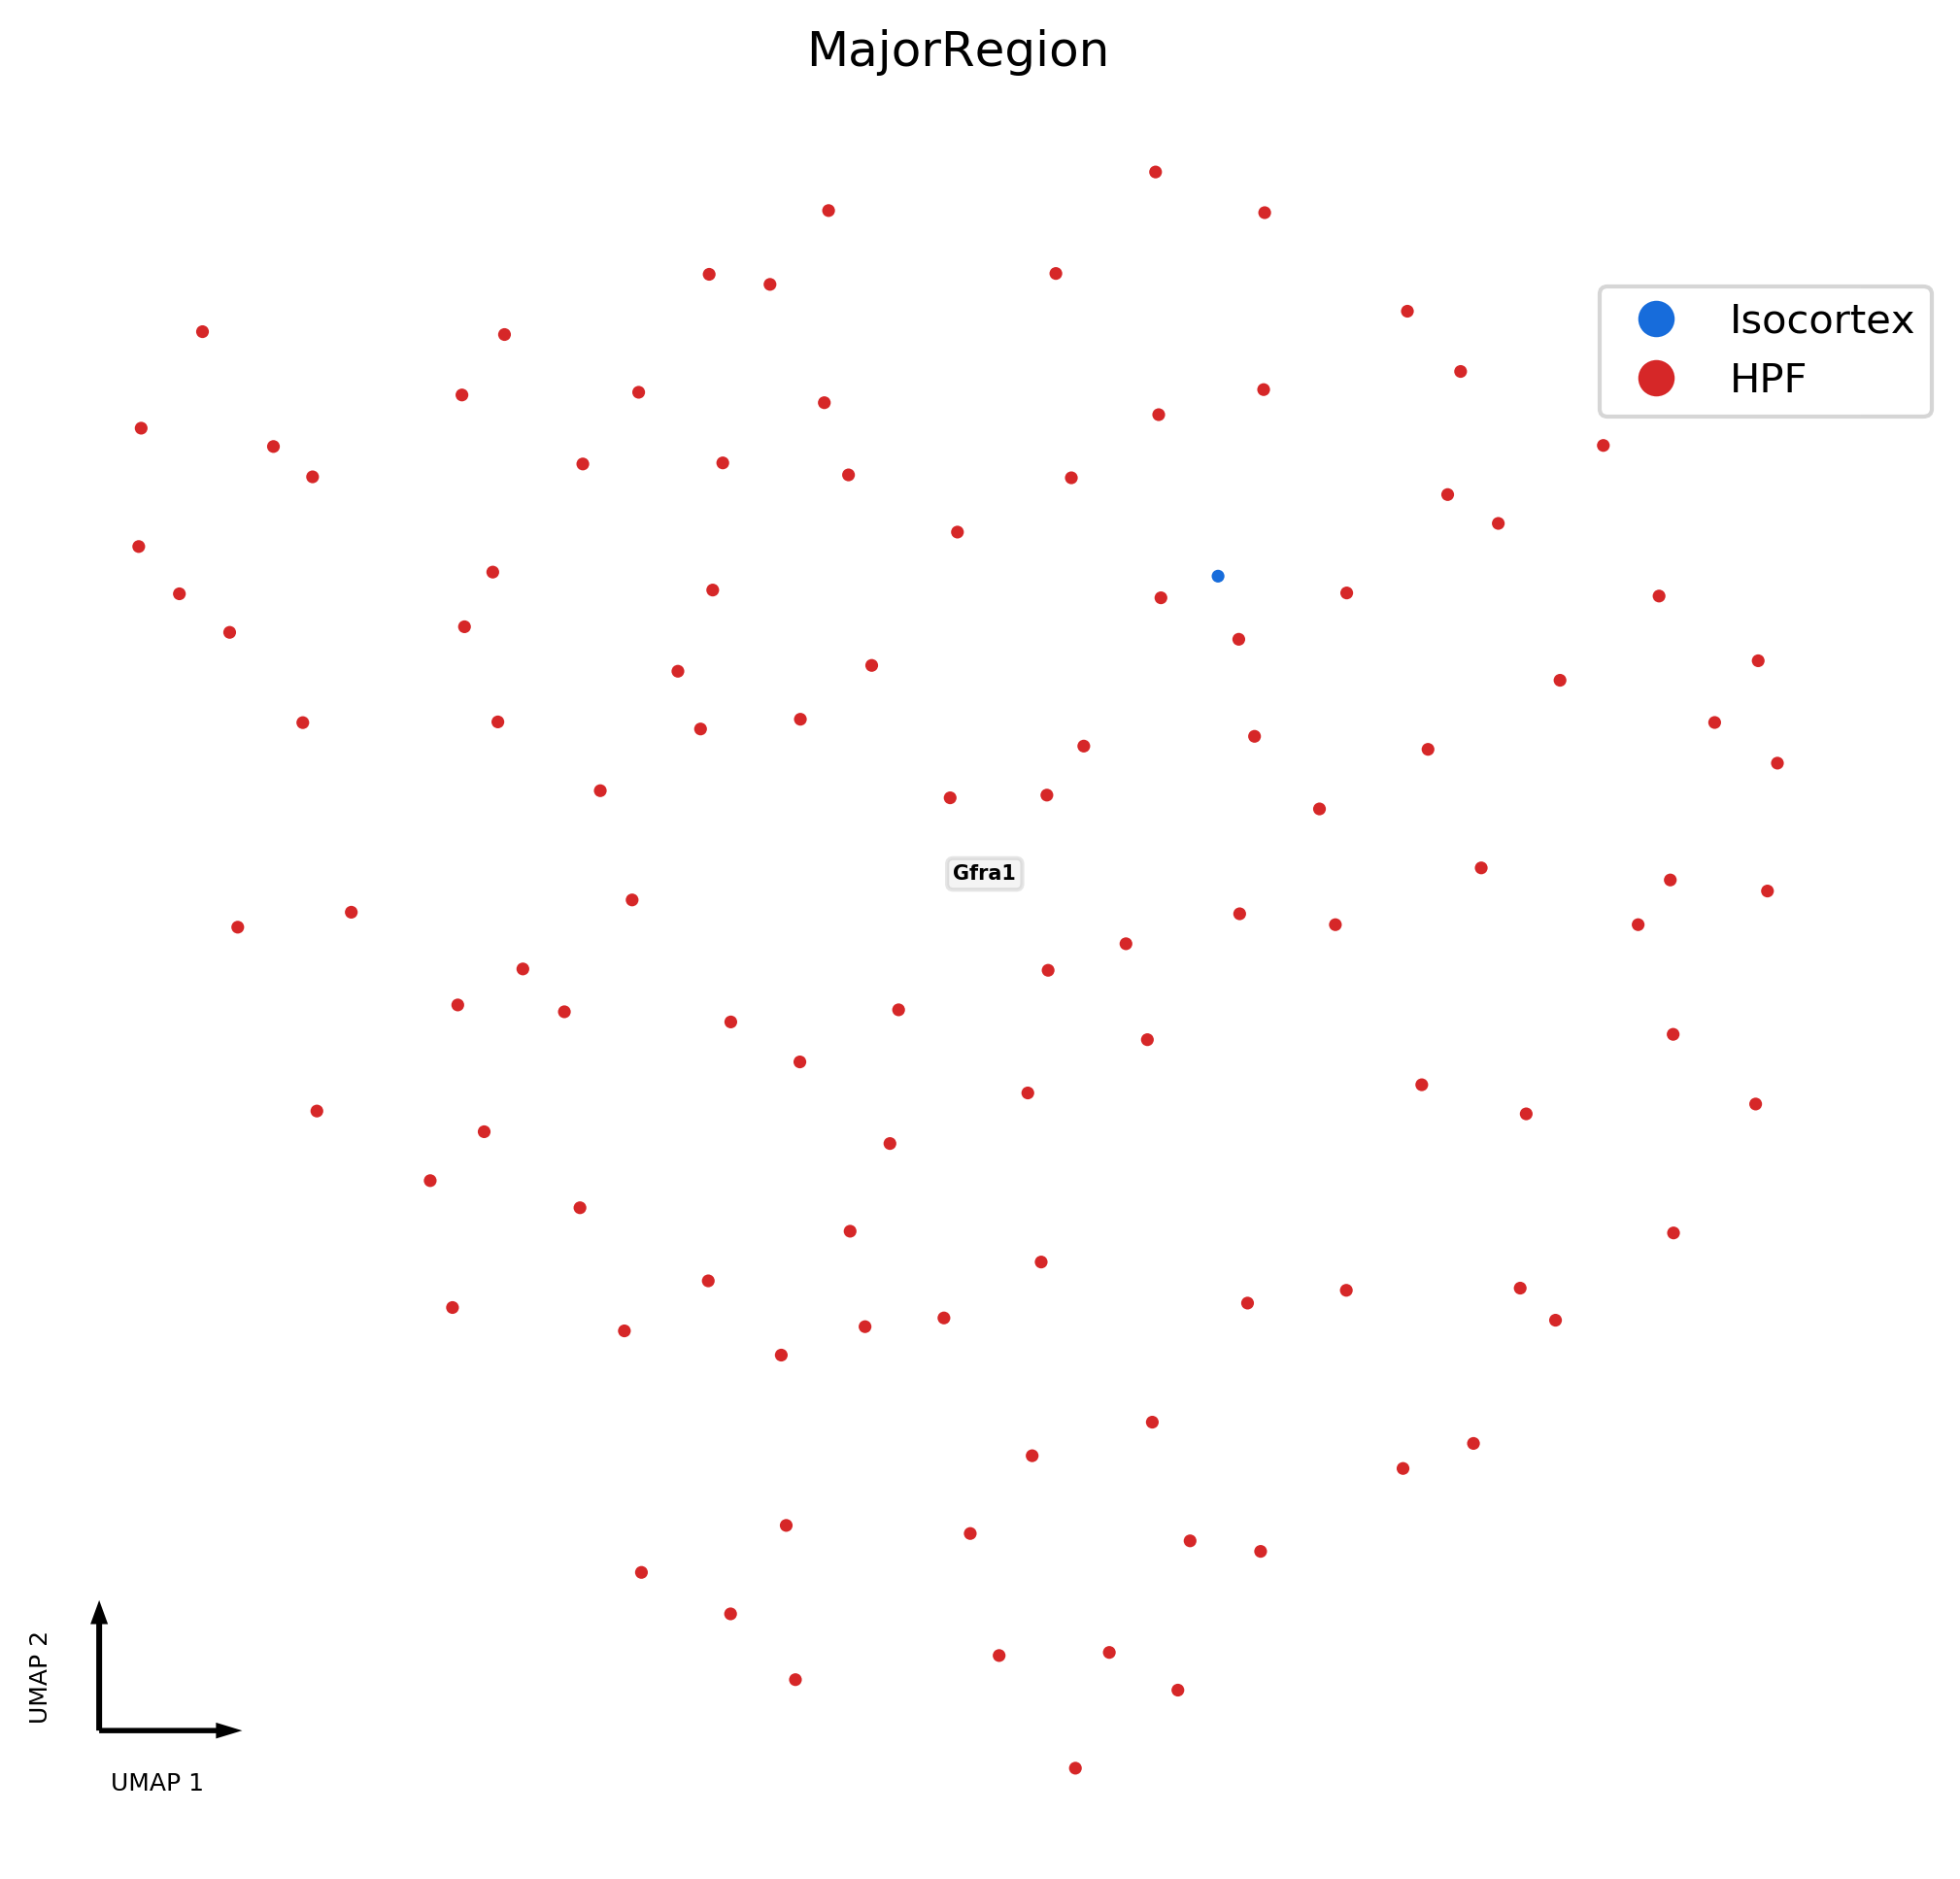

In [9]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
categorical_scatter(cell_meta, 
                    ax, 
                    coord_base=coords, 
                    hue='MajorRegion',
                    text_anno=cluster_col_name,
                    palette=major_region_palette,
                    show_legend=True,
                    scatter_kws=dict(s=s),
                    text_anno_kws=dict(fontsize=5),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)),
                    max_points=None)
ax.set_title('MajorRegion')
fig.savefig(fig_dir / f'MajorRegion_{coords}.pdf', bbox_inches='tight')

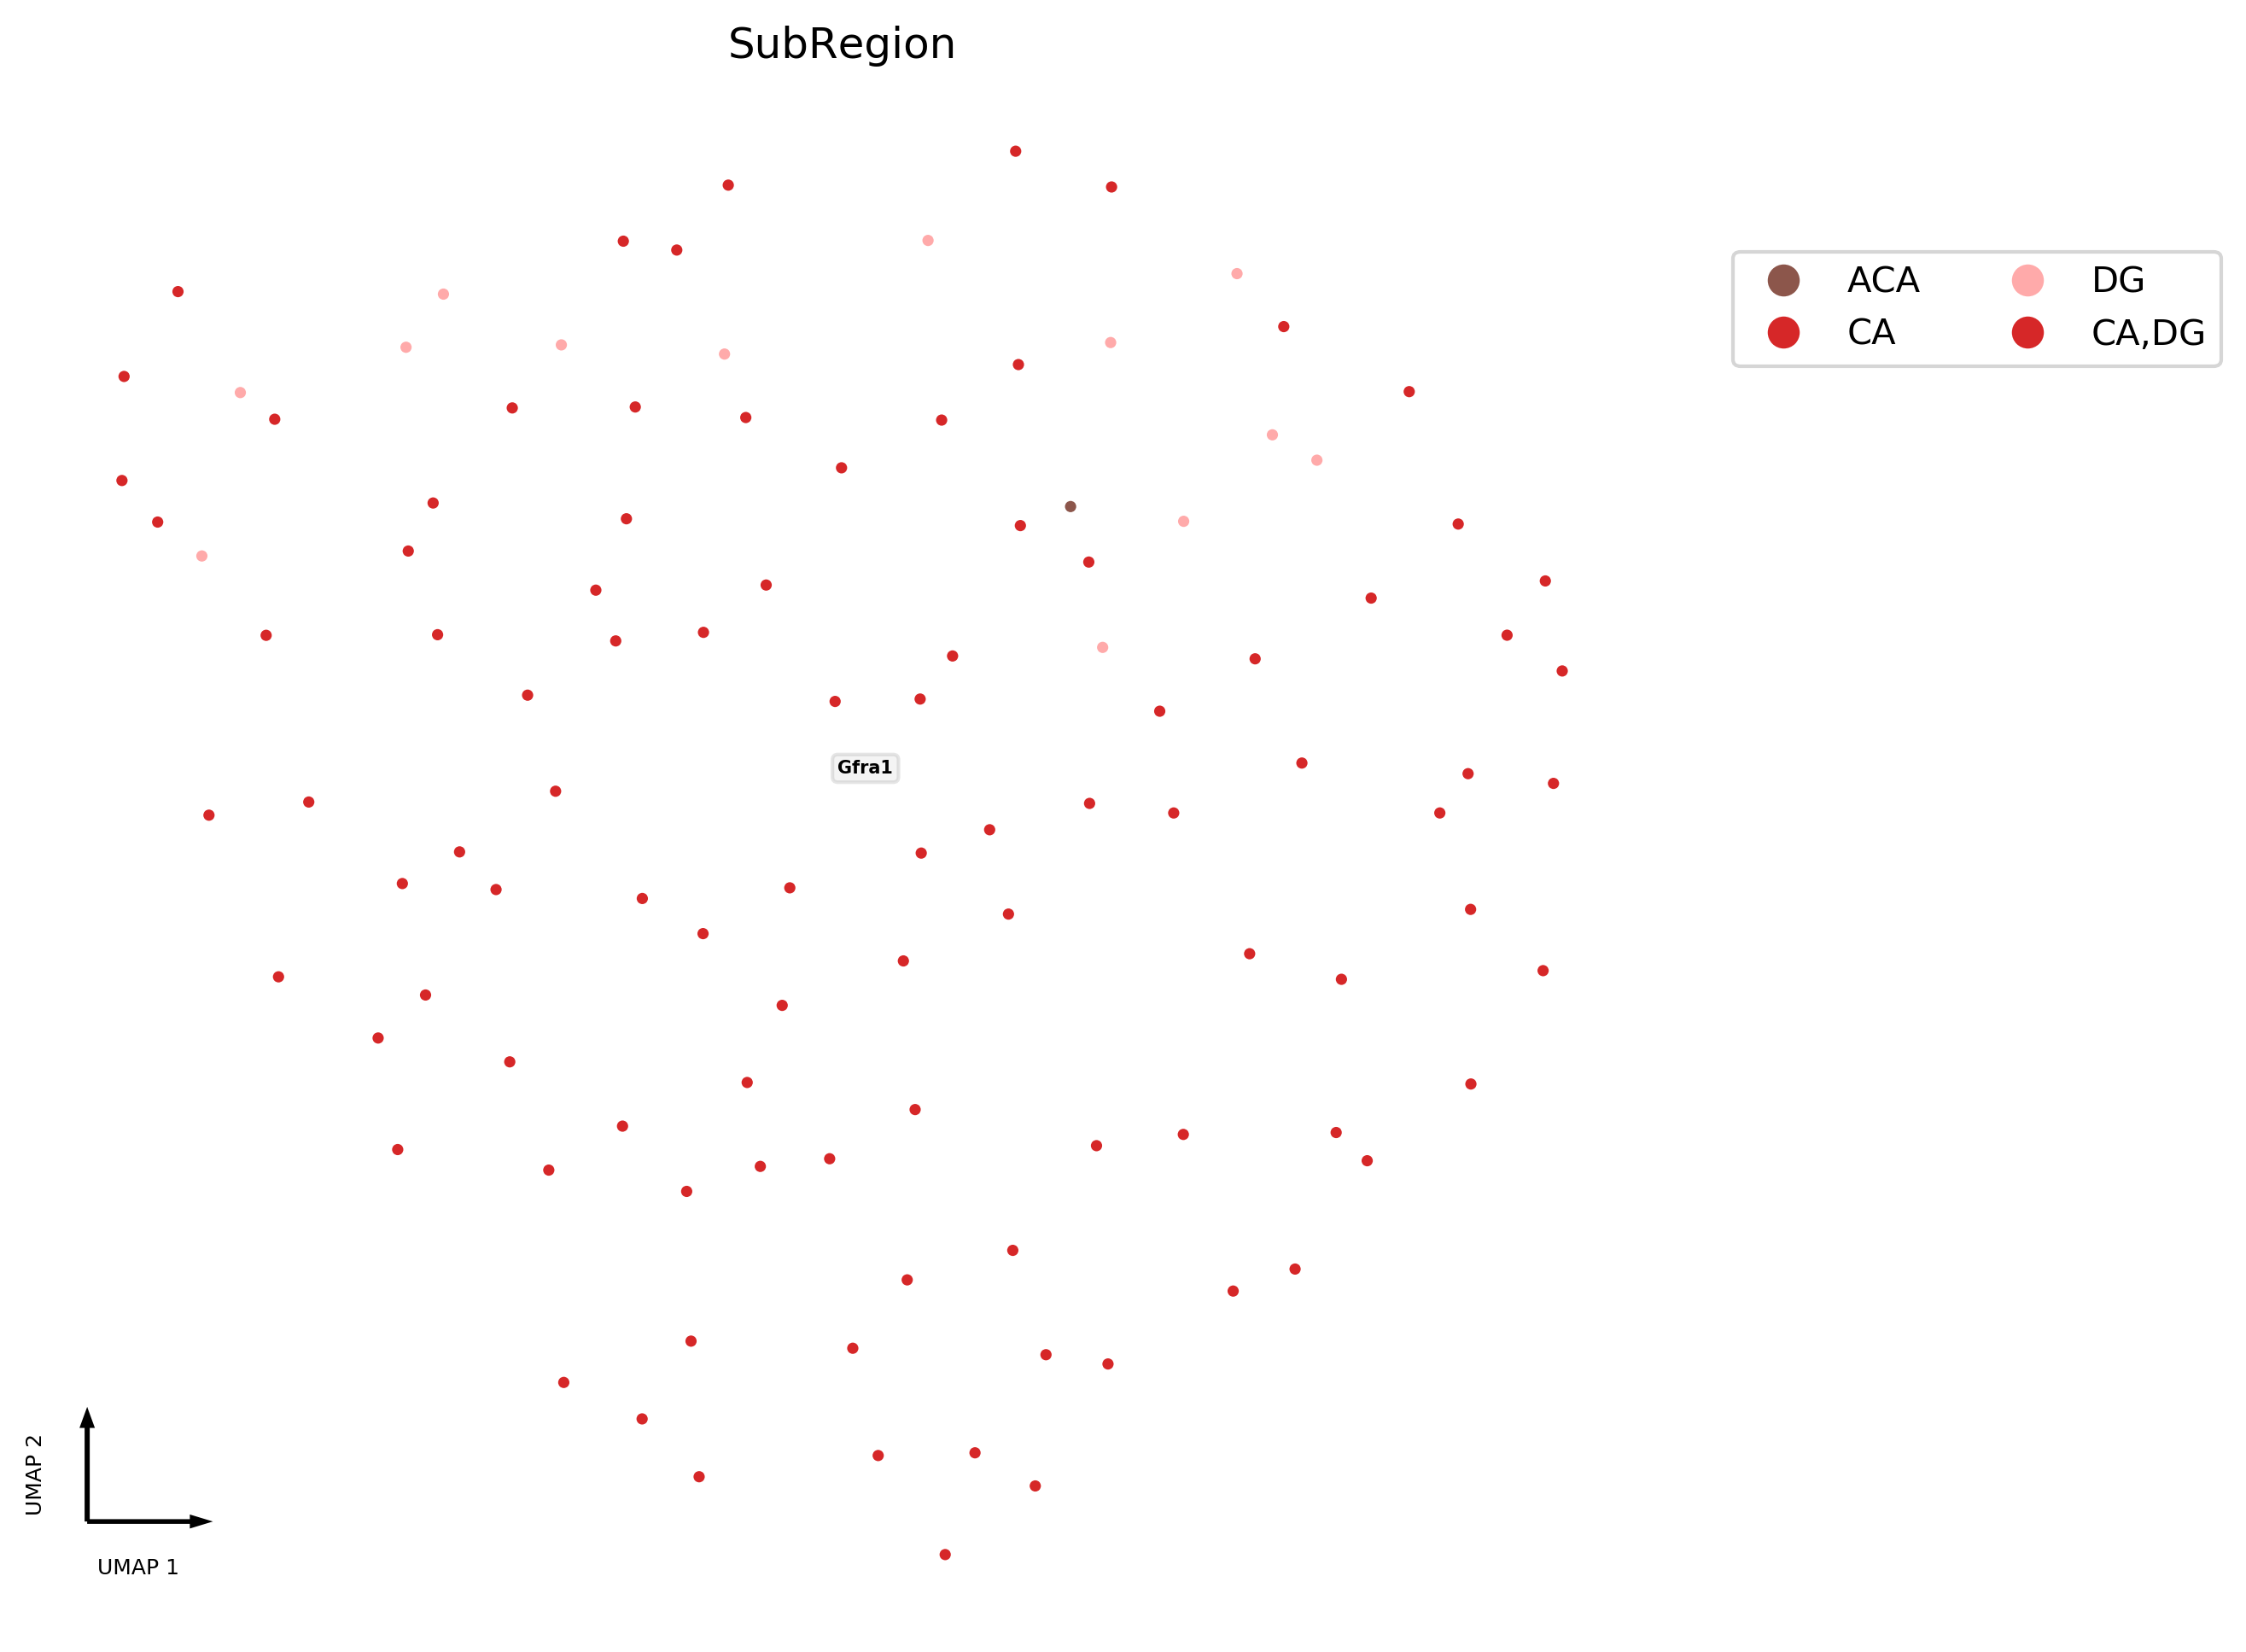

In [10]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
categorical_scatter(cell_meta, 
                    ax, 
                    coord_base=coords, 
                    hue='SubRegion',
                    text_anno=cluster_col_name,
                    palette=sub_region_palette,
                    show_legend=True,
                    scatter_kws=dict(s=s),
                    text_anno_kws=dict(fontsize=5),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)),
                    max_points=None)
ax.set_title('SubRegion')
fig.savefig(fig_dir / f'SubRegion_{coords}.pdf', bbox_inches='tight')

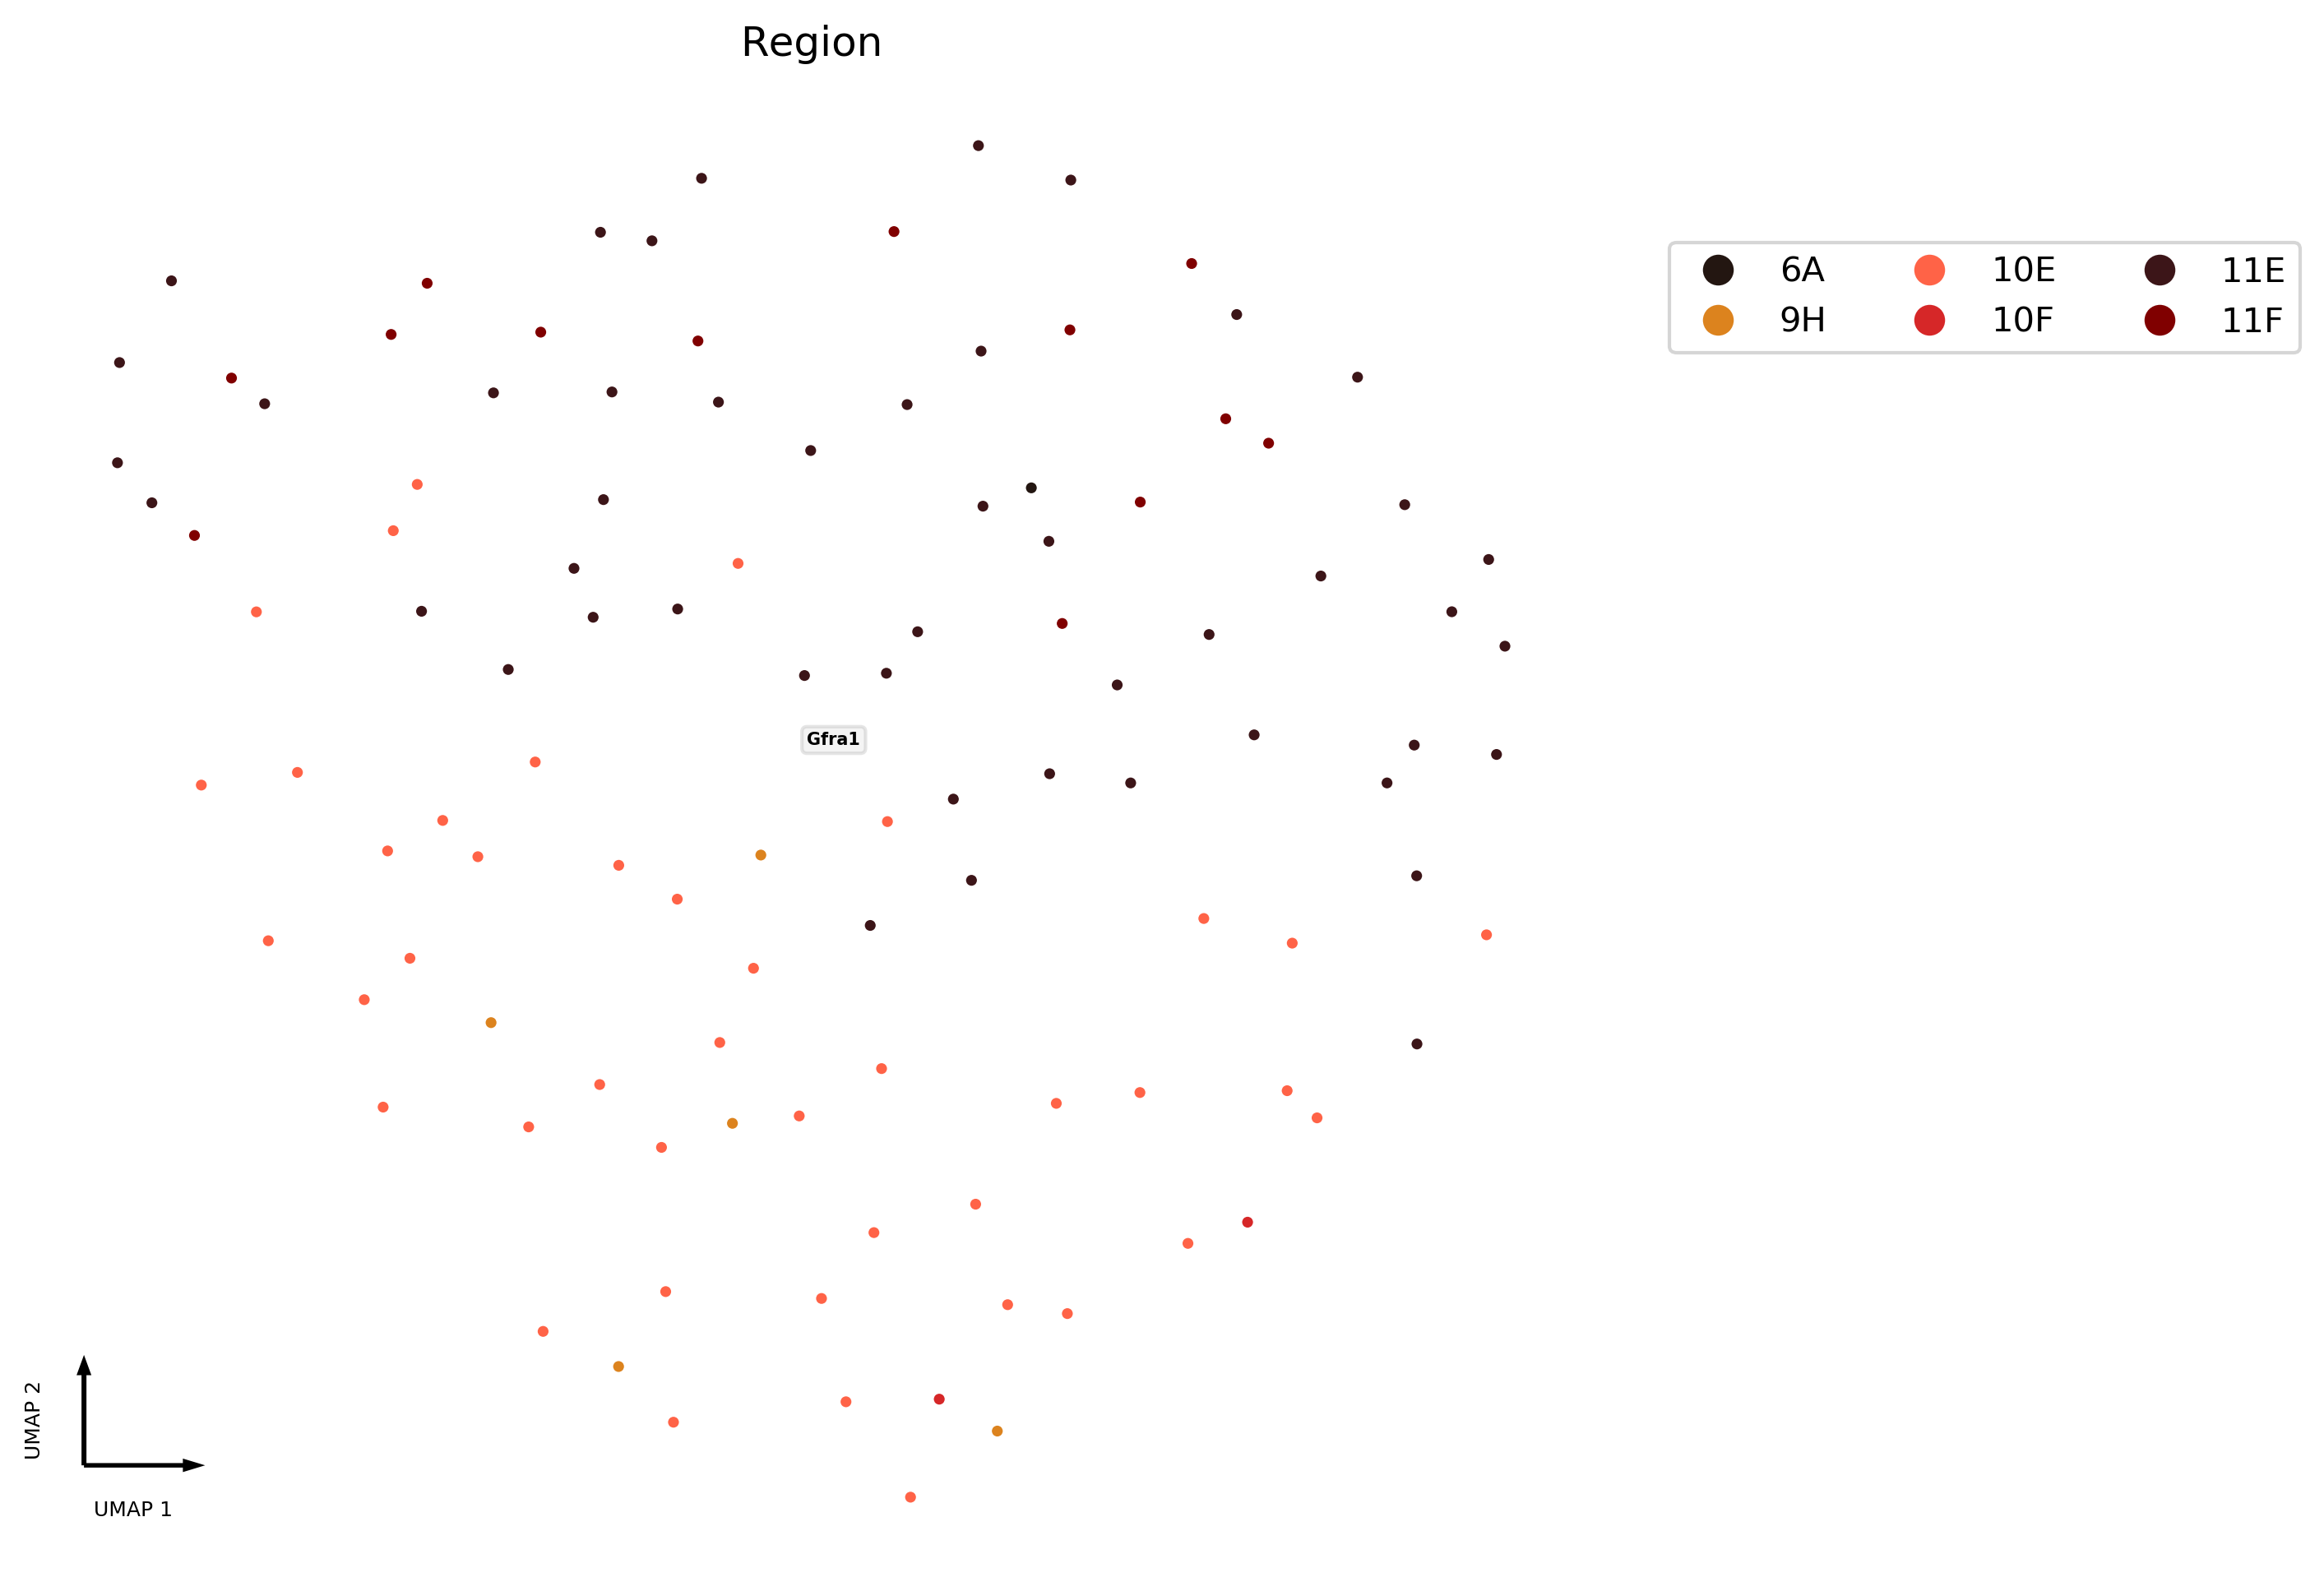

In [11]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
categorical_scatter(cell_meta, 
                    ax, 
                    coord_base=coords, 
                    hue='Region',
                    text_anno=cluster_col_name,
                    palette=region_palette,
                    show_legend=True,
                    scatter_kws=dict(s=s),
                    text_anno_kws=dict(fontsize=5),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)),
                    max_points=None)
ax.set_title('Region')
fig.savefig(fig_dir / f'Region_{coords}.pdf', bbox_inches='tight')

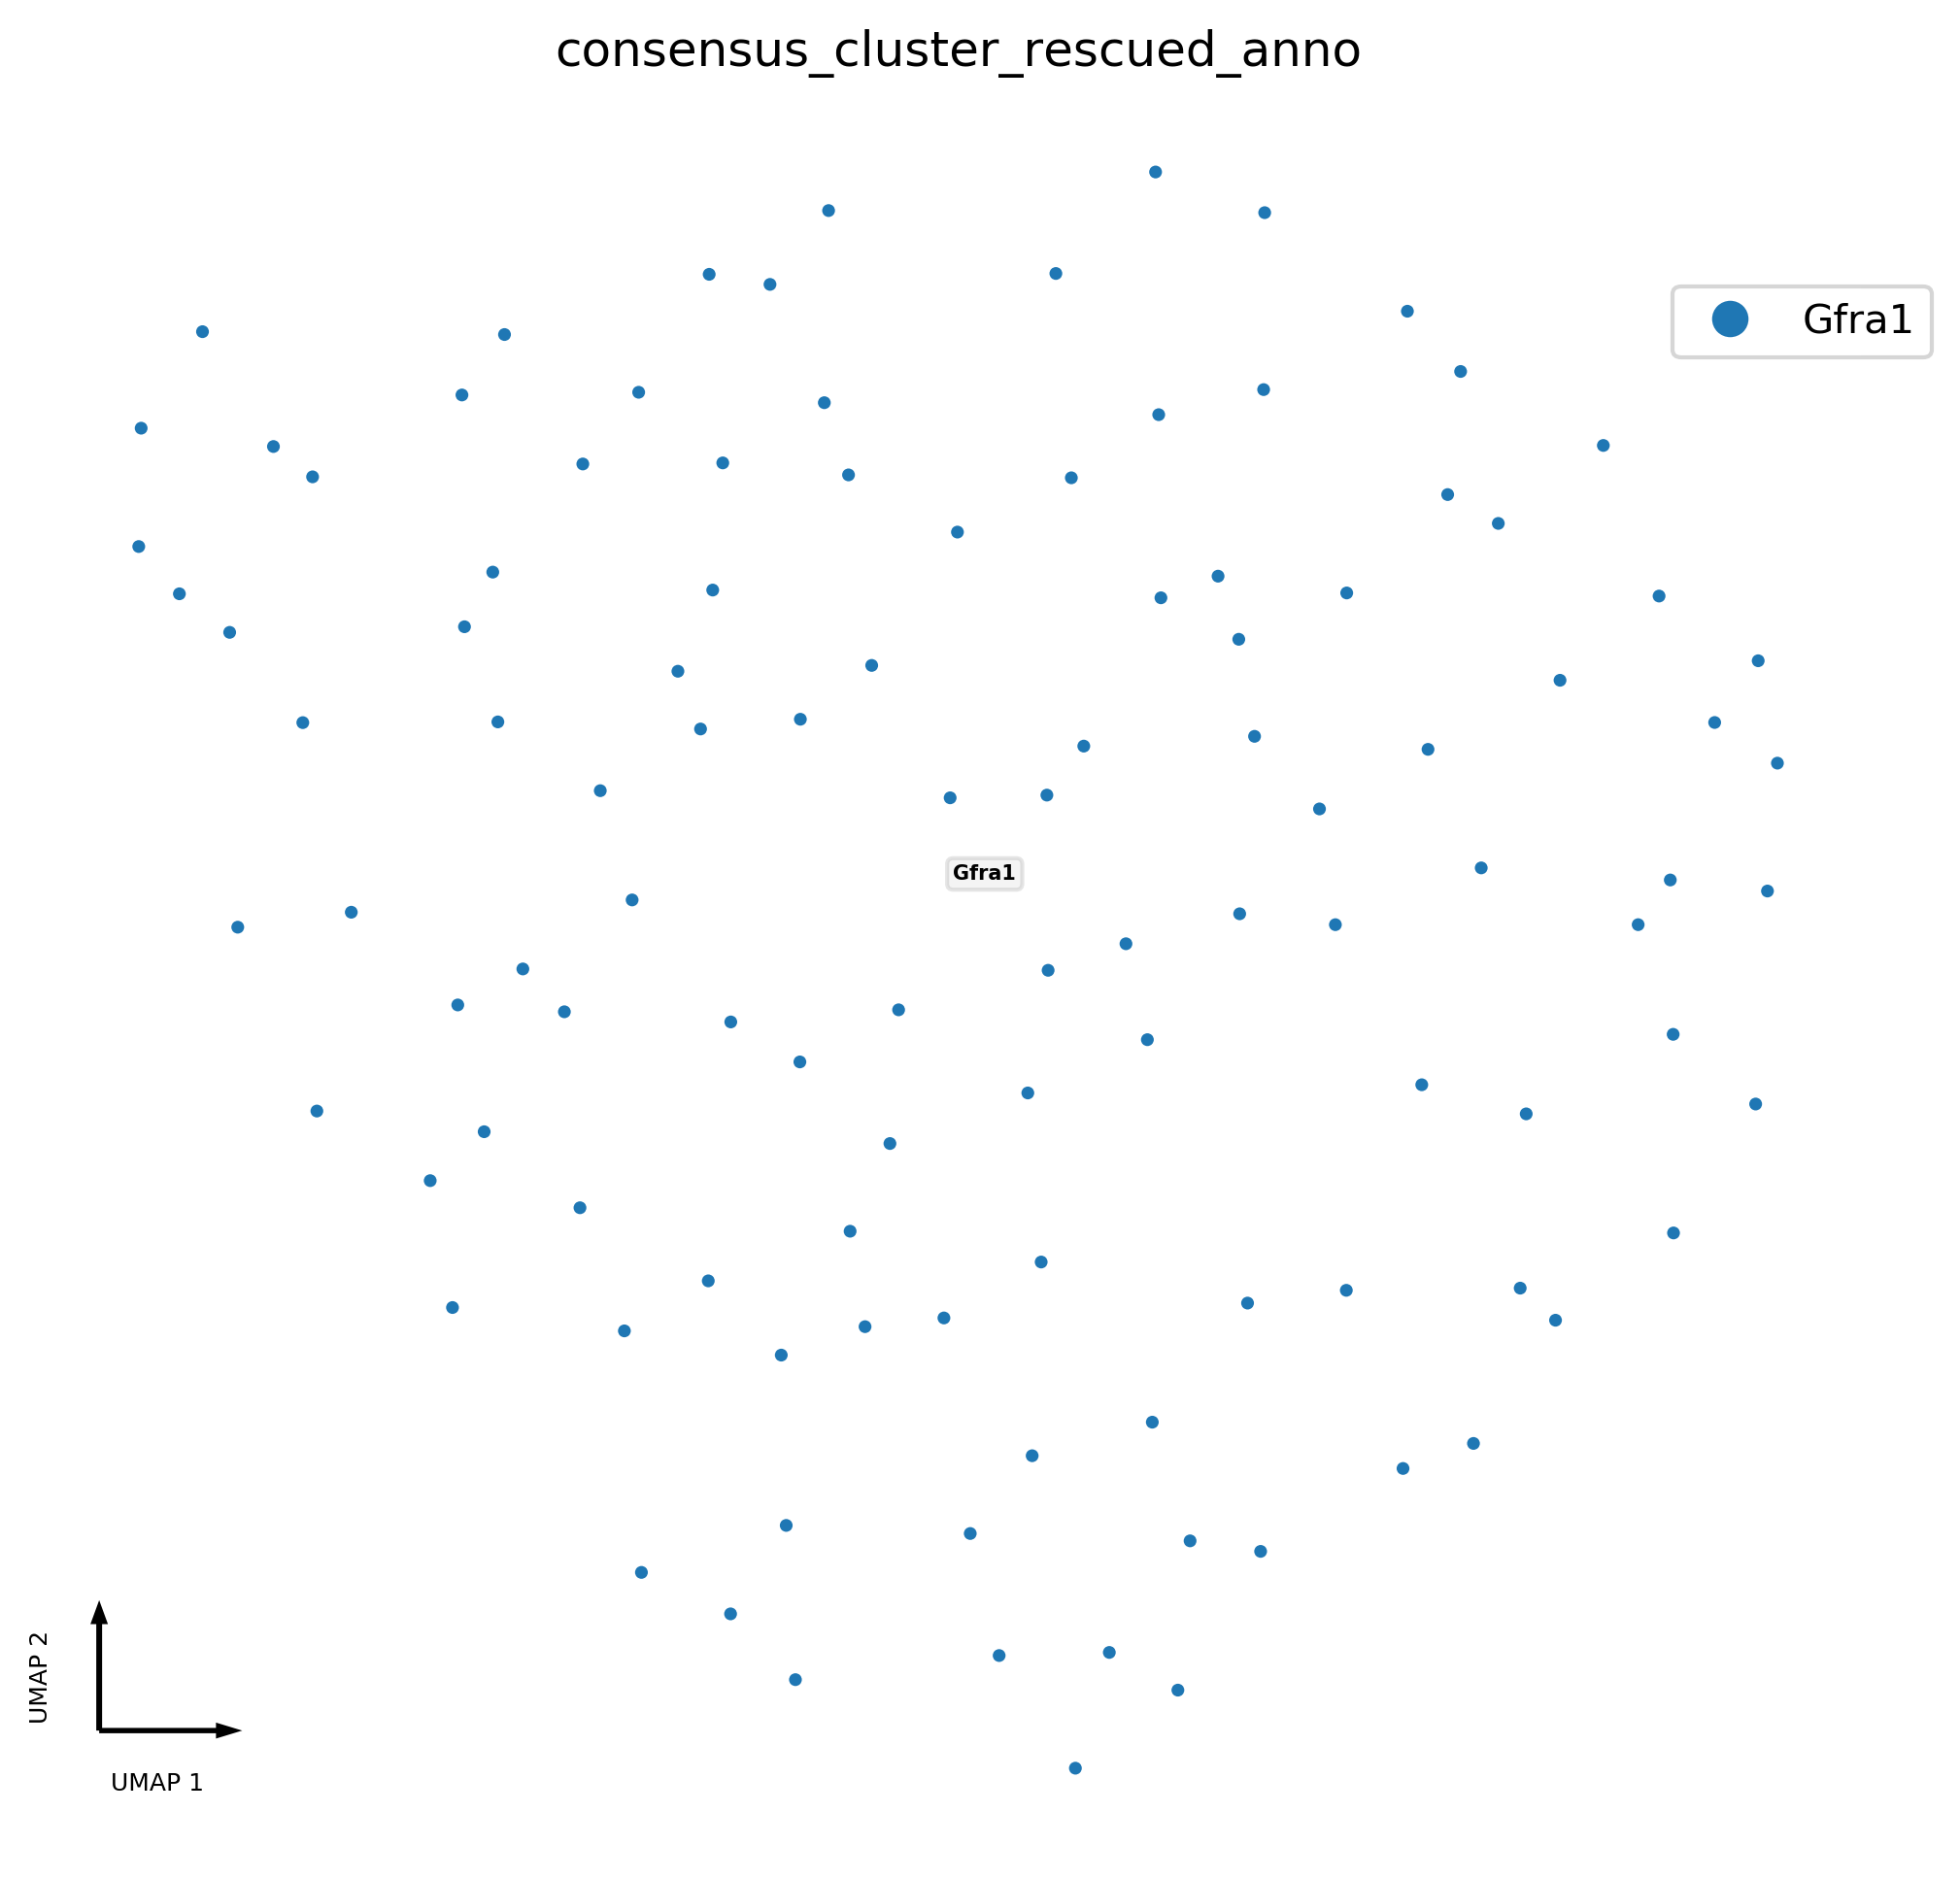

In [12]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
categorical_scatter(cell_meta, 
                    ax, 
                    coord_base=coords, 
                    hue=cluster_col_name,
                    text_anno=cluster_col_name,
                    palette=level_one_palette(cell_meta[cluster_col_name]),
                    show_legend=True,
                    scatter_kws=dict(s=s),
                    text_anno_kws=dict(fontsize=5),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)),
                    max_points=None)
ax.set_title(cluster_col_name)
fig.savefig(fig_dir / f'{cluster_col_name}_{coords}.pdf', bbox_inches='tight')

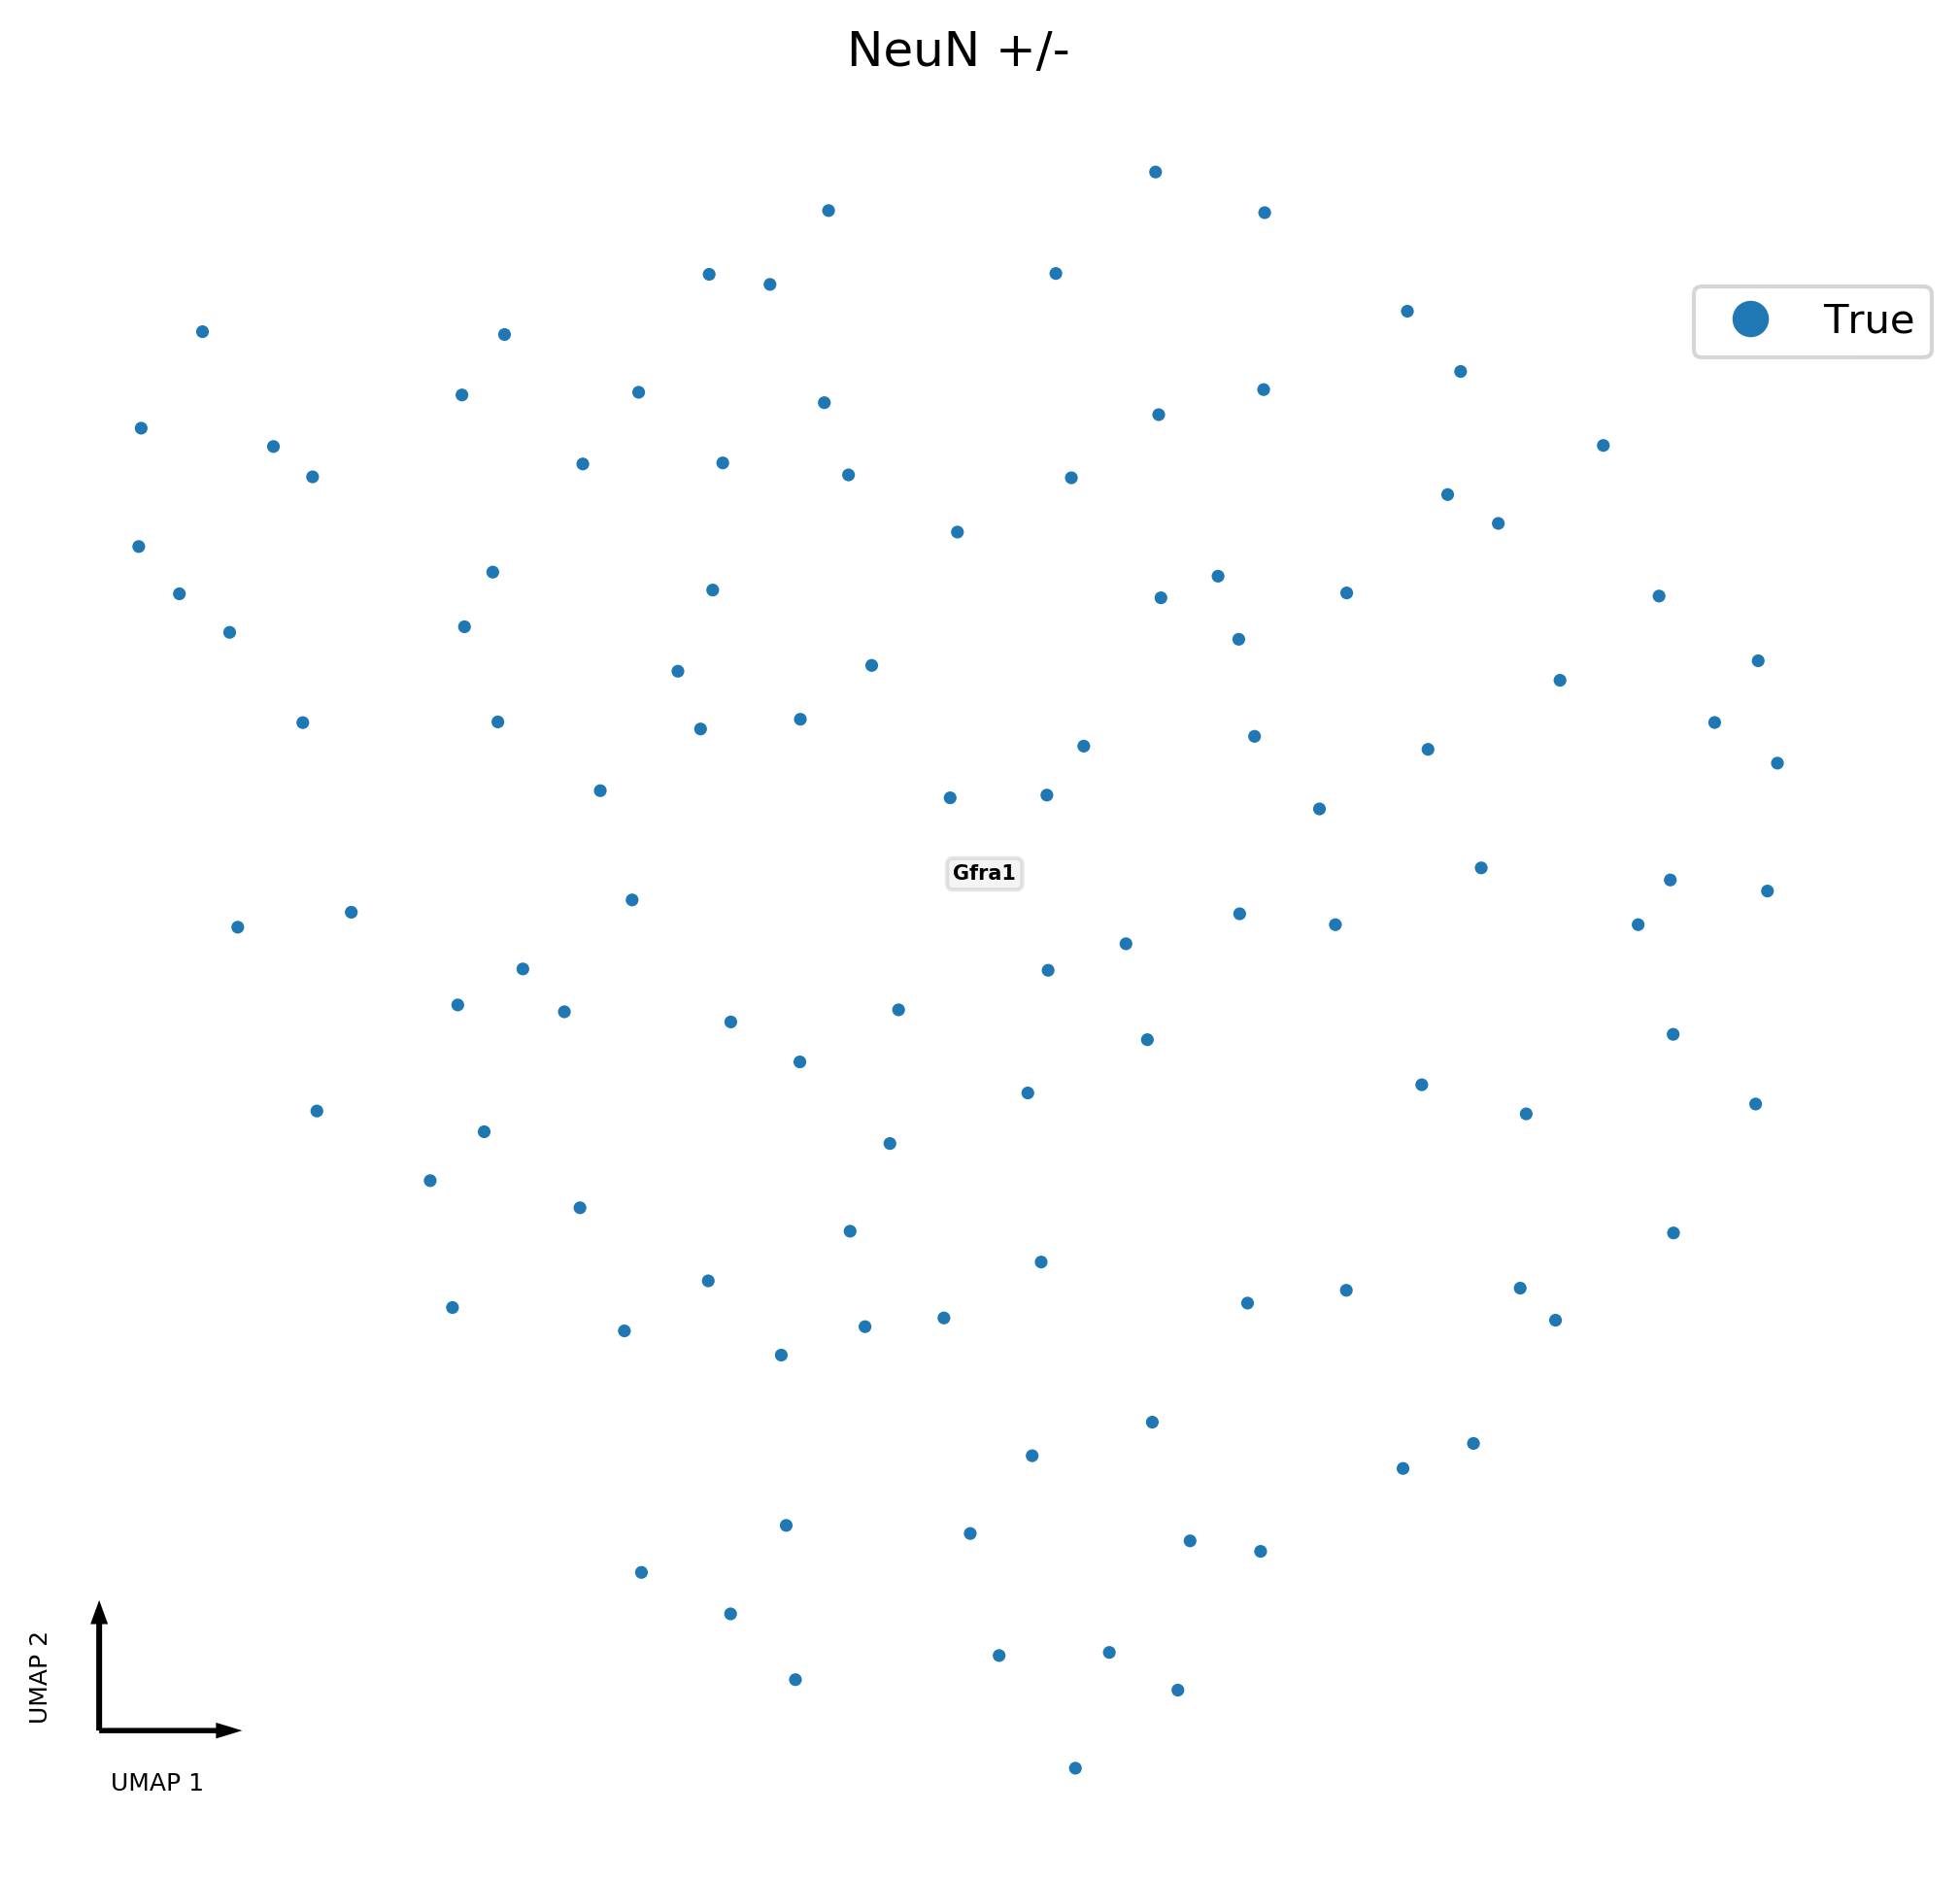

In [13]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
categorical_scatter(cell_meta, 
                    ax, 
                    coord_base=coords, 
                    hue=(cell_meta['Col96'] != 11),
                    text_anno=cluster_col_name,
                    palette='tab10',
                    show_legend=True,
                    scatter_kws=dict(s=s),
                    text_anno_kws=dict(fontsize=5),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)),
                    max_points=None)
ax.set_title('NeuN +/-')

fig.savefig(fig_dir / f'MeuN_{coords}.pdf', bbox_inches='tight')

### tSNE

In [14]:
coords = 'tsne'

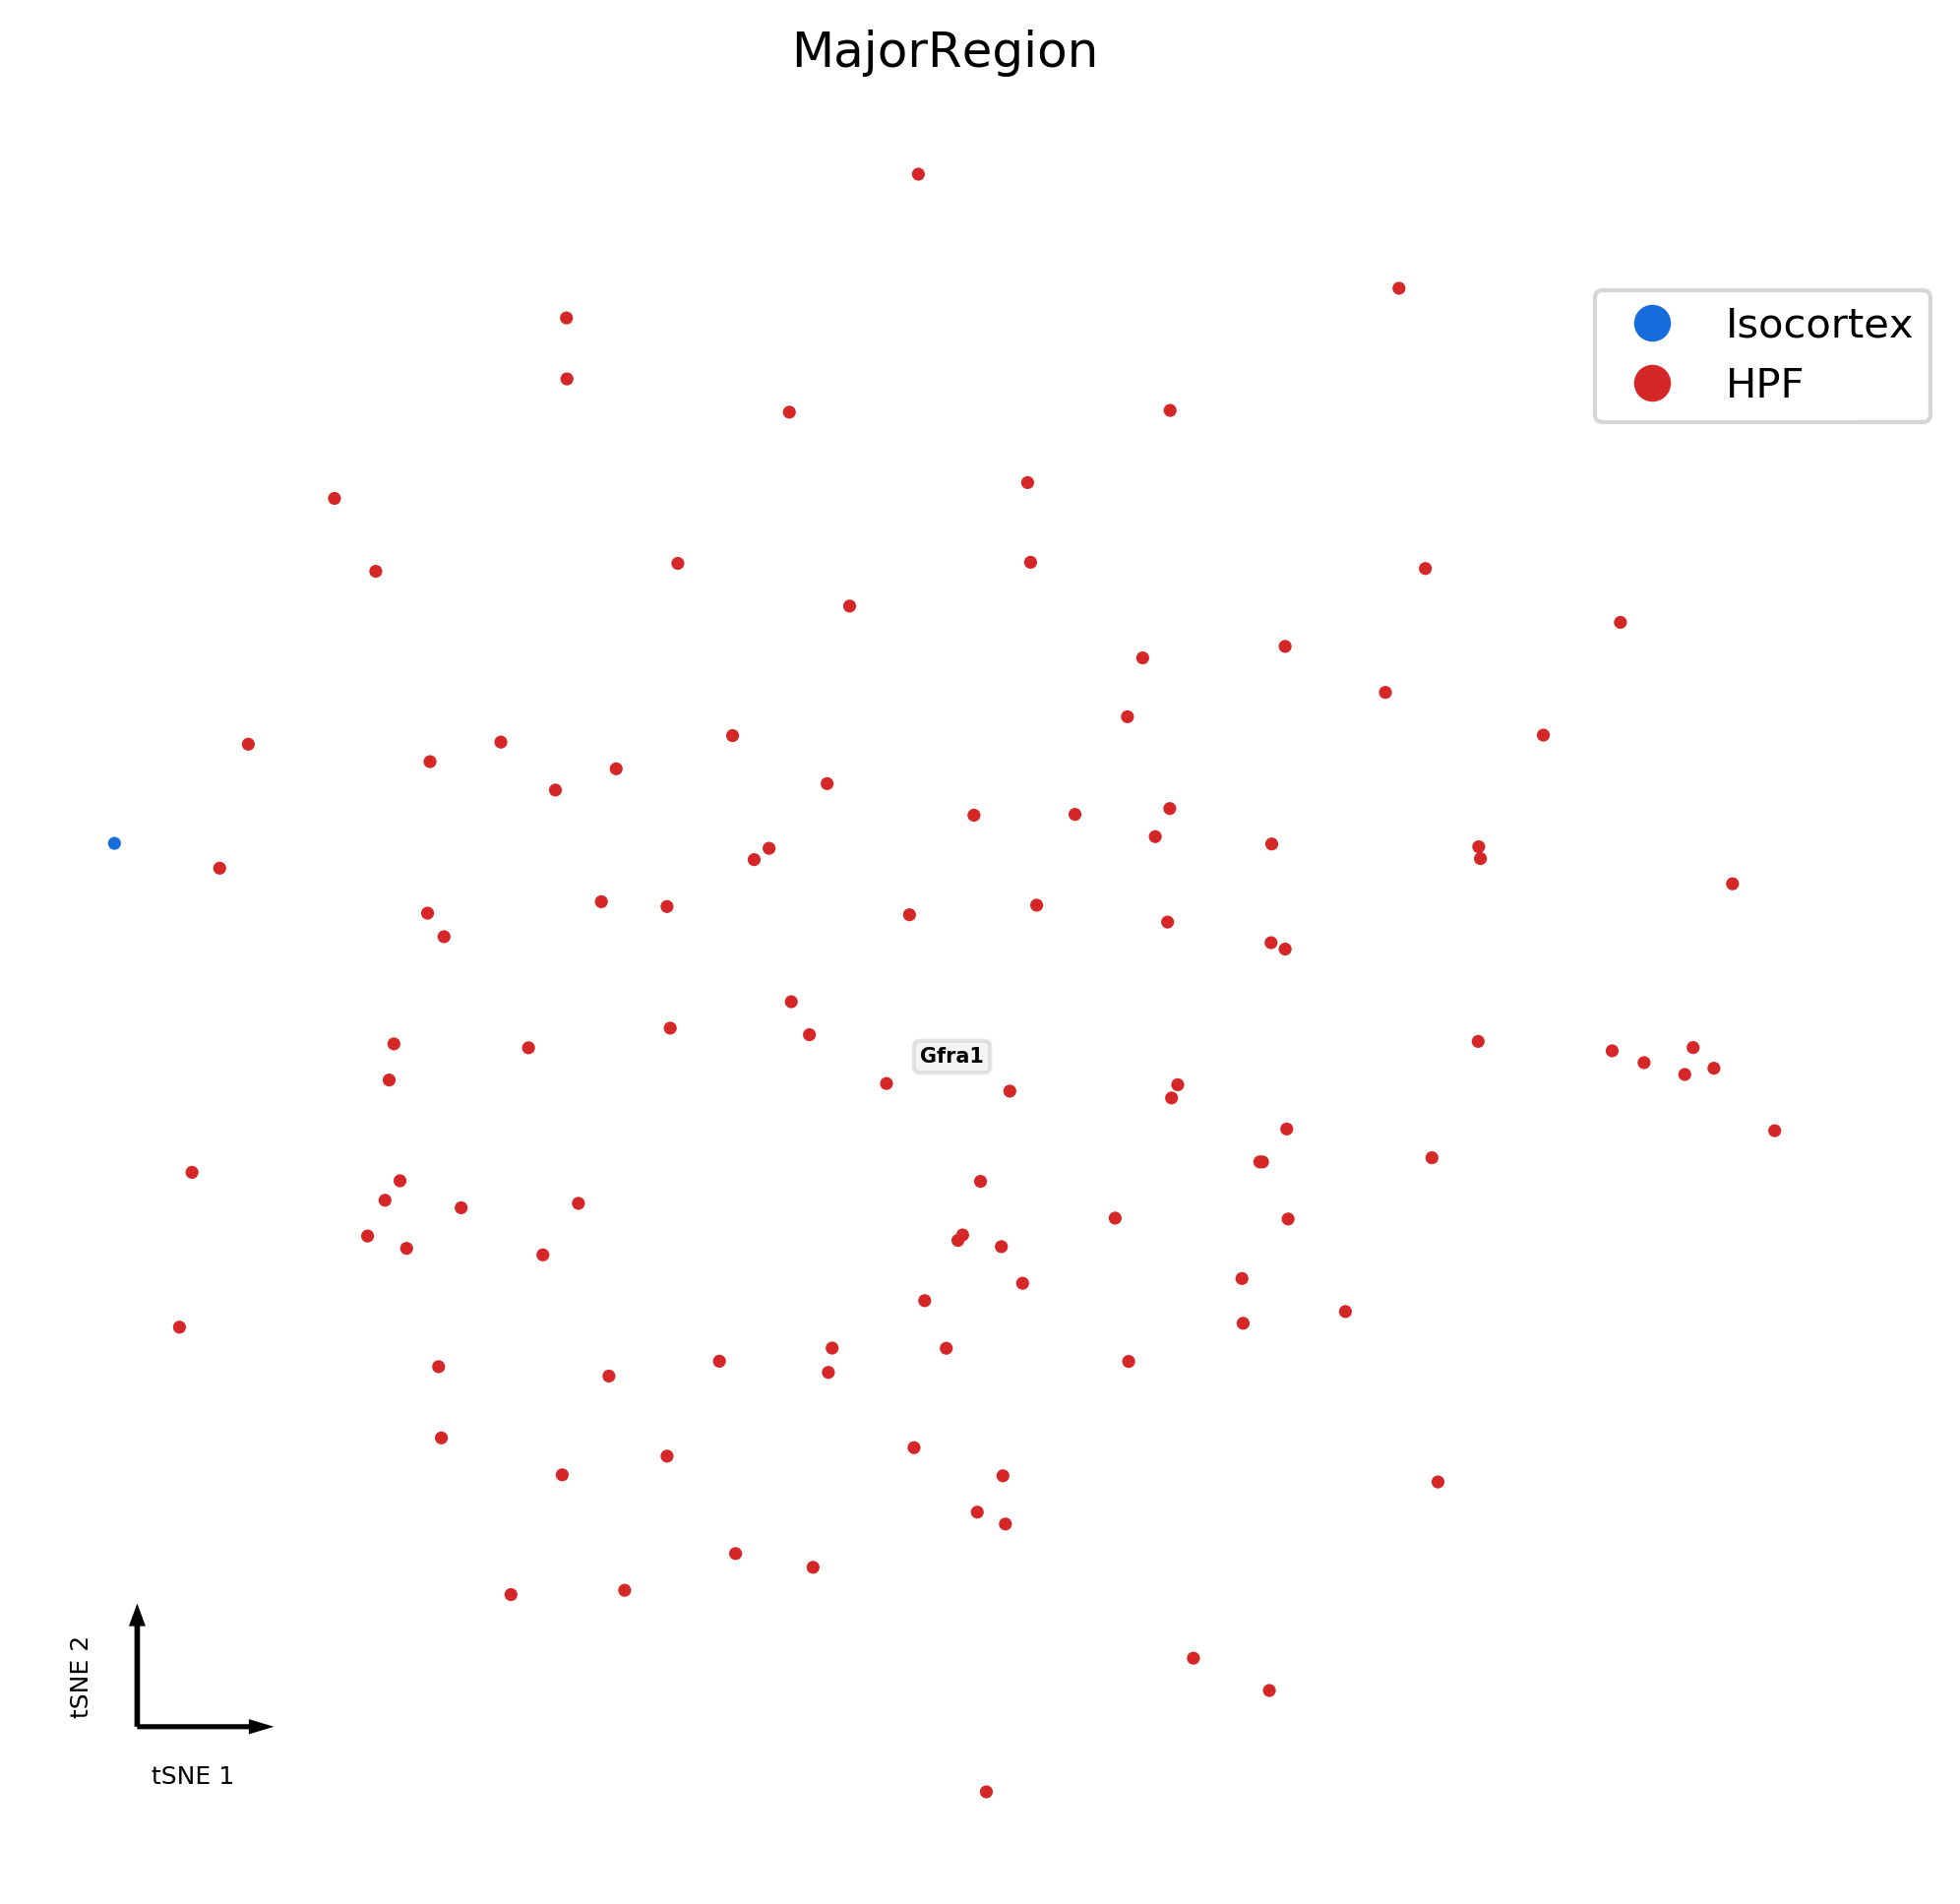

In [15]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
categorical_scatter(cell_meta, 
                    ax, 
                    coord_base=coords, 
                    hue='MajorRegion',
                    text_anno=cluster_col_name,
                    palette=major_region_palette,
                    show_legend=True,
                    scatter_kws=dict(s=s),
                    text_anno_kws=dict(fontsize=5),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)),
                    max_points=None)
ax.set_title('MajorRegion')
fig.savefig(fig_dir / f'MajorRegion_{coords}.pdf', bbox_inches='tight')

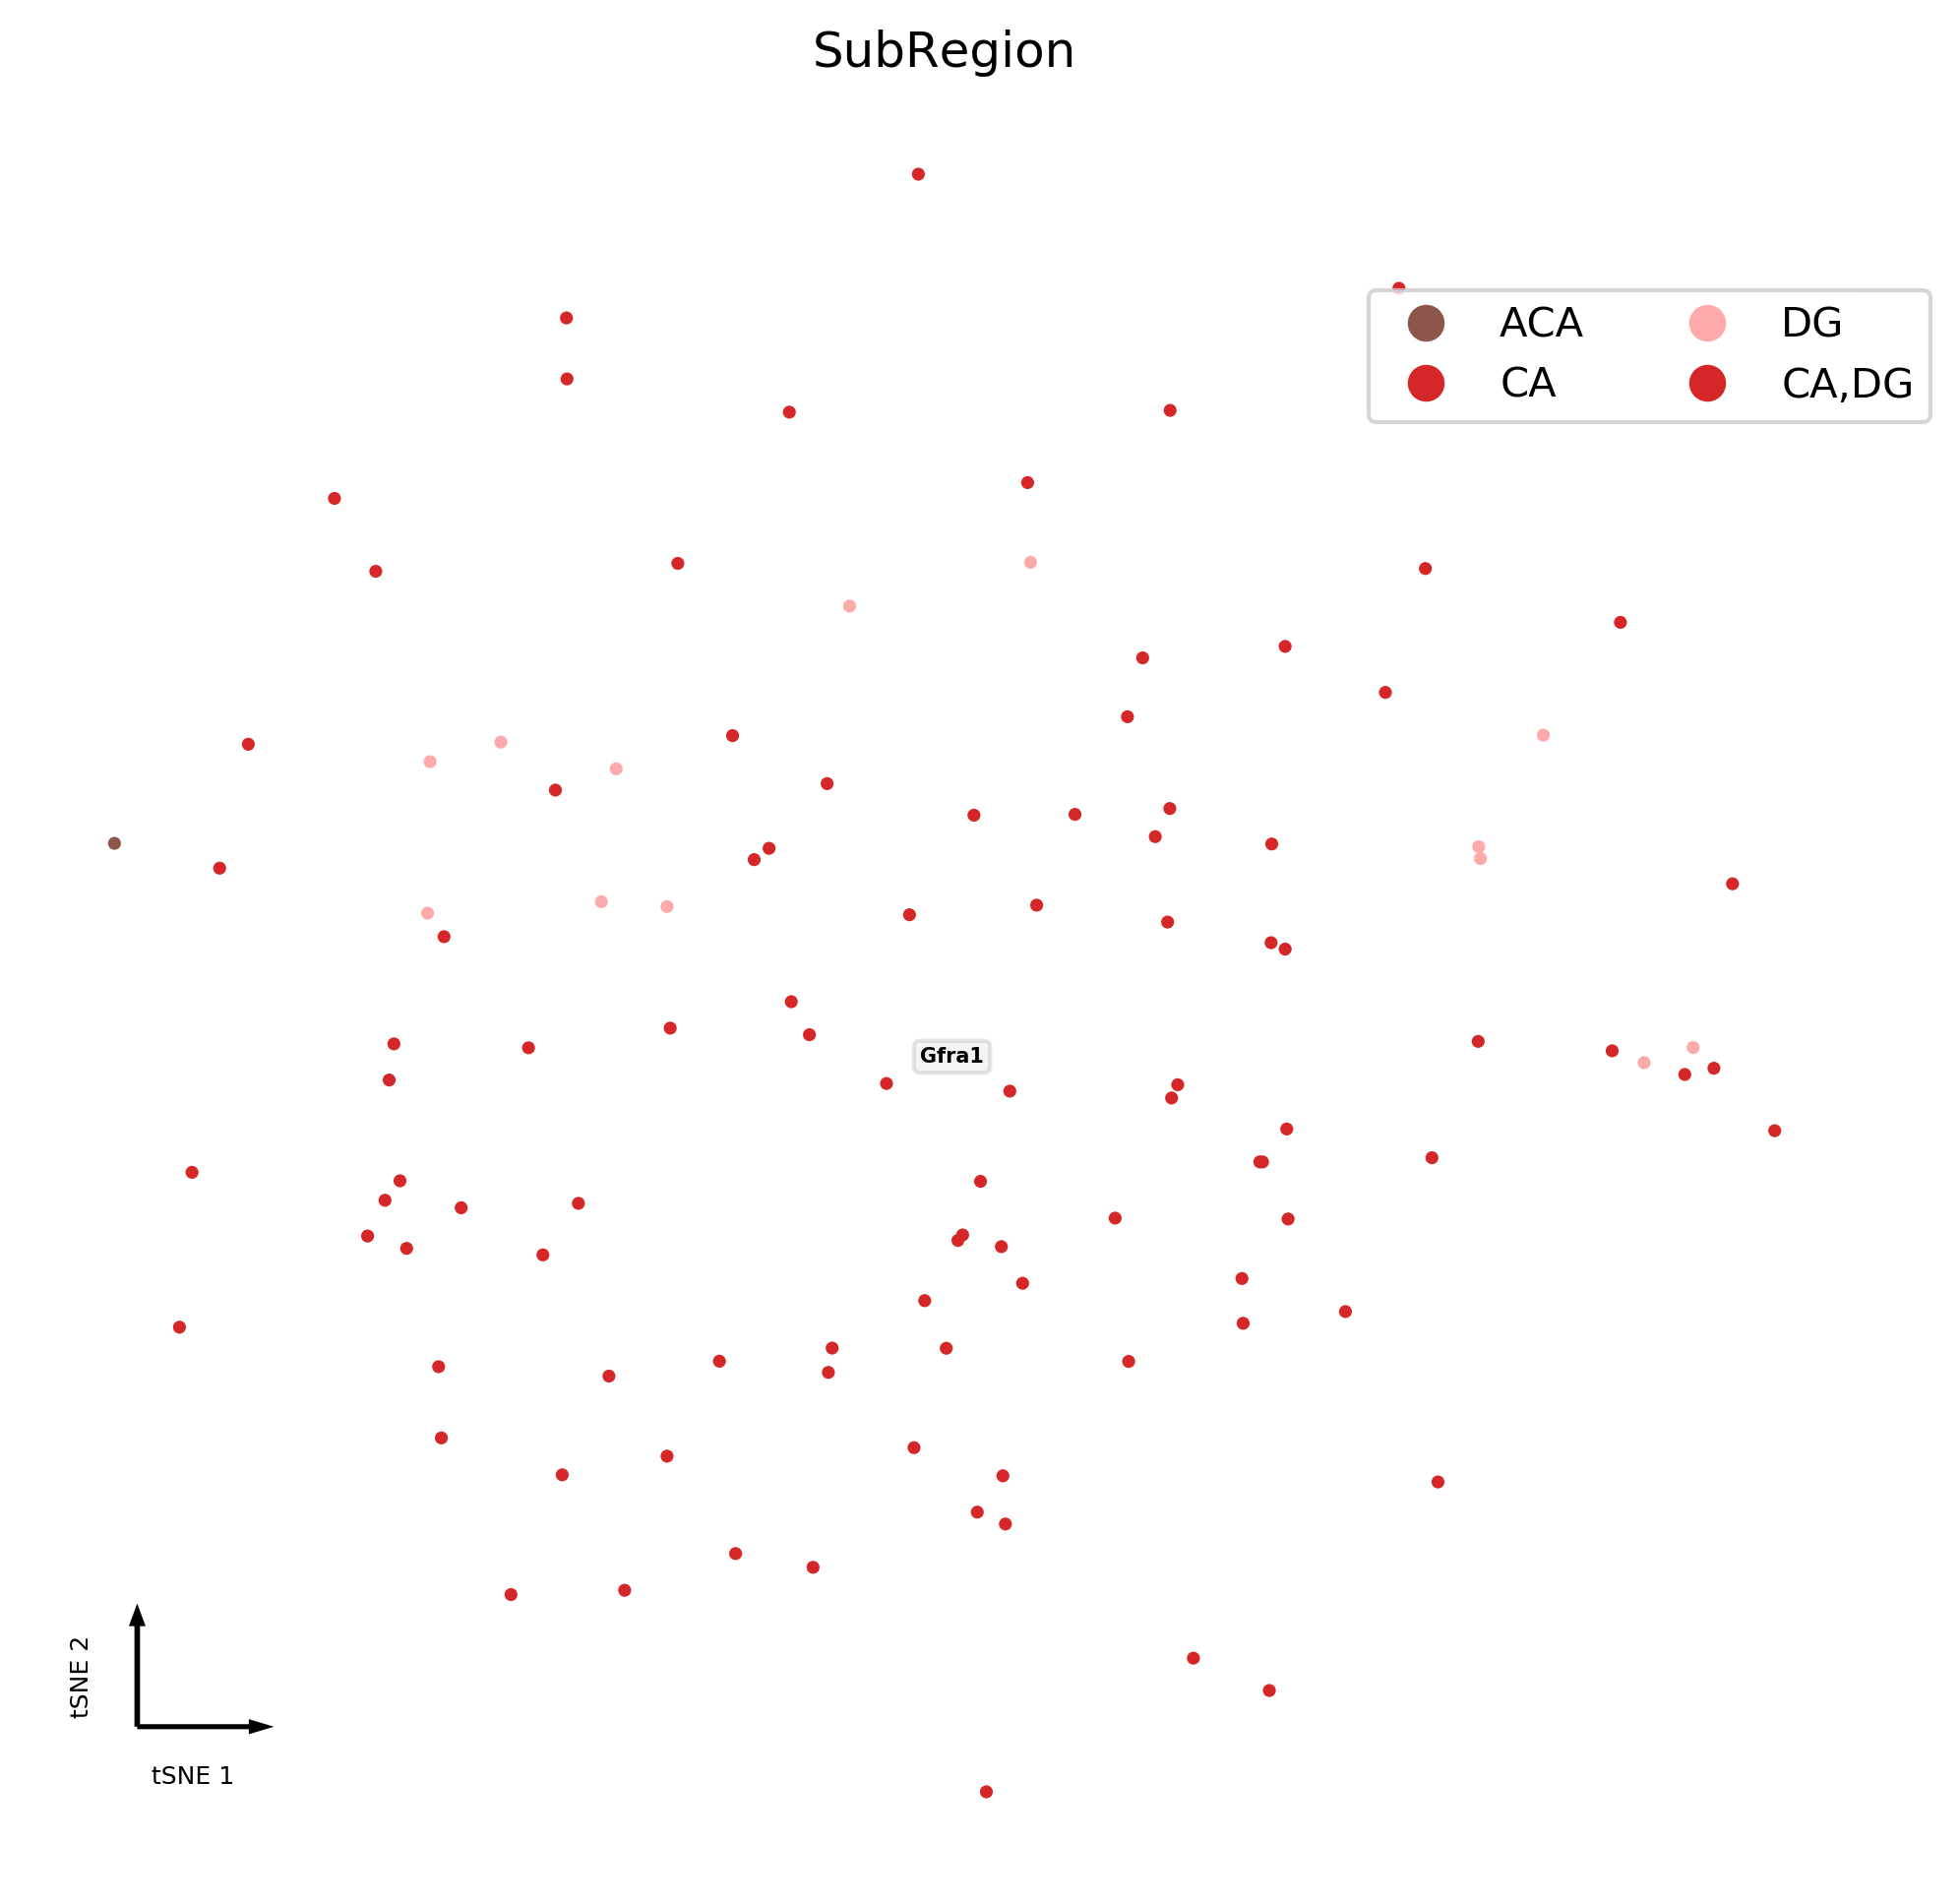

In [16]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
categorical_scatter(cell_meta, 
                    ax, 
                    coord_base=coords, 
                    hue='SubRegion',
                    text_anno=cluster_col_name,
                    palette=sub_region_palette,
                    show_legend=True,
                    scatter_kws=dict(s=s),
                    text_anno_kws=dict(fontsize=5),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)),
                    max_points=None)
ax.set_title('SubRegion')
fig.savefig(fig_dir / f'SubRegion_{coords}.pdf', bbox_inches='tight')

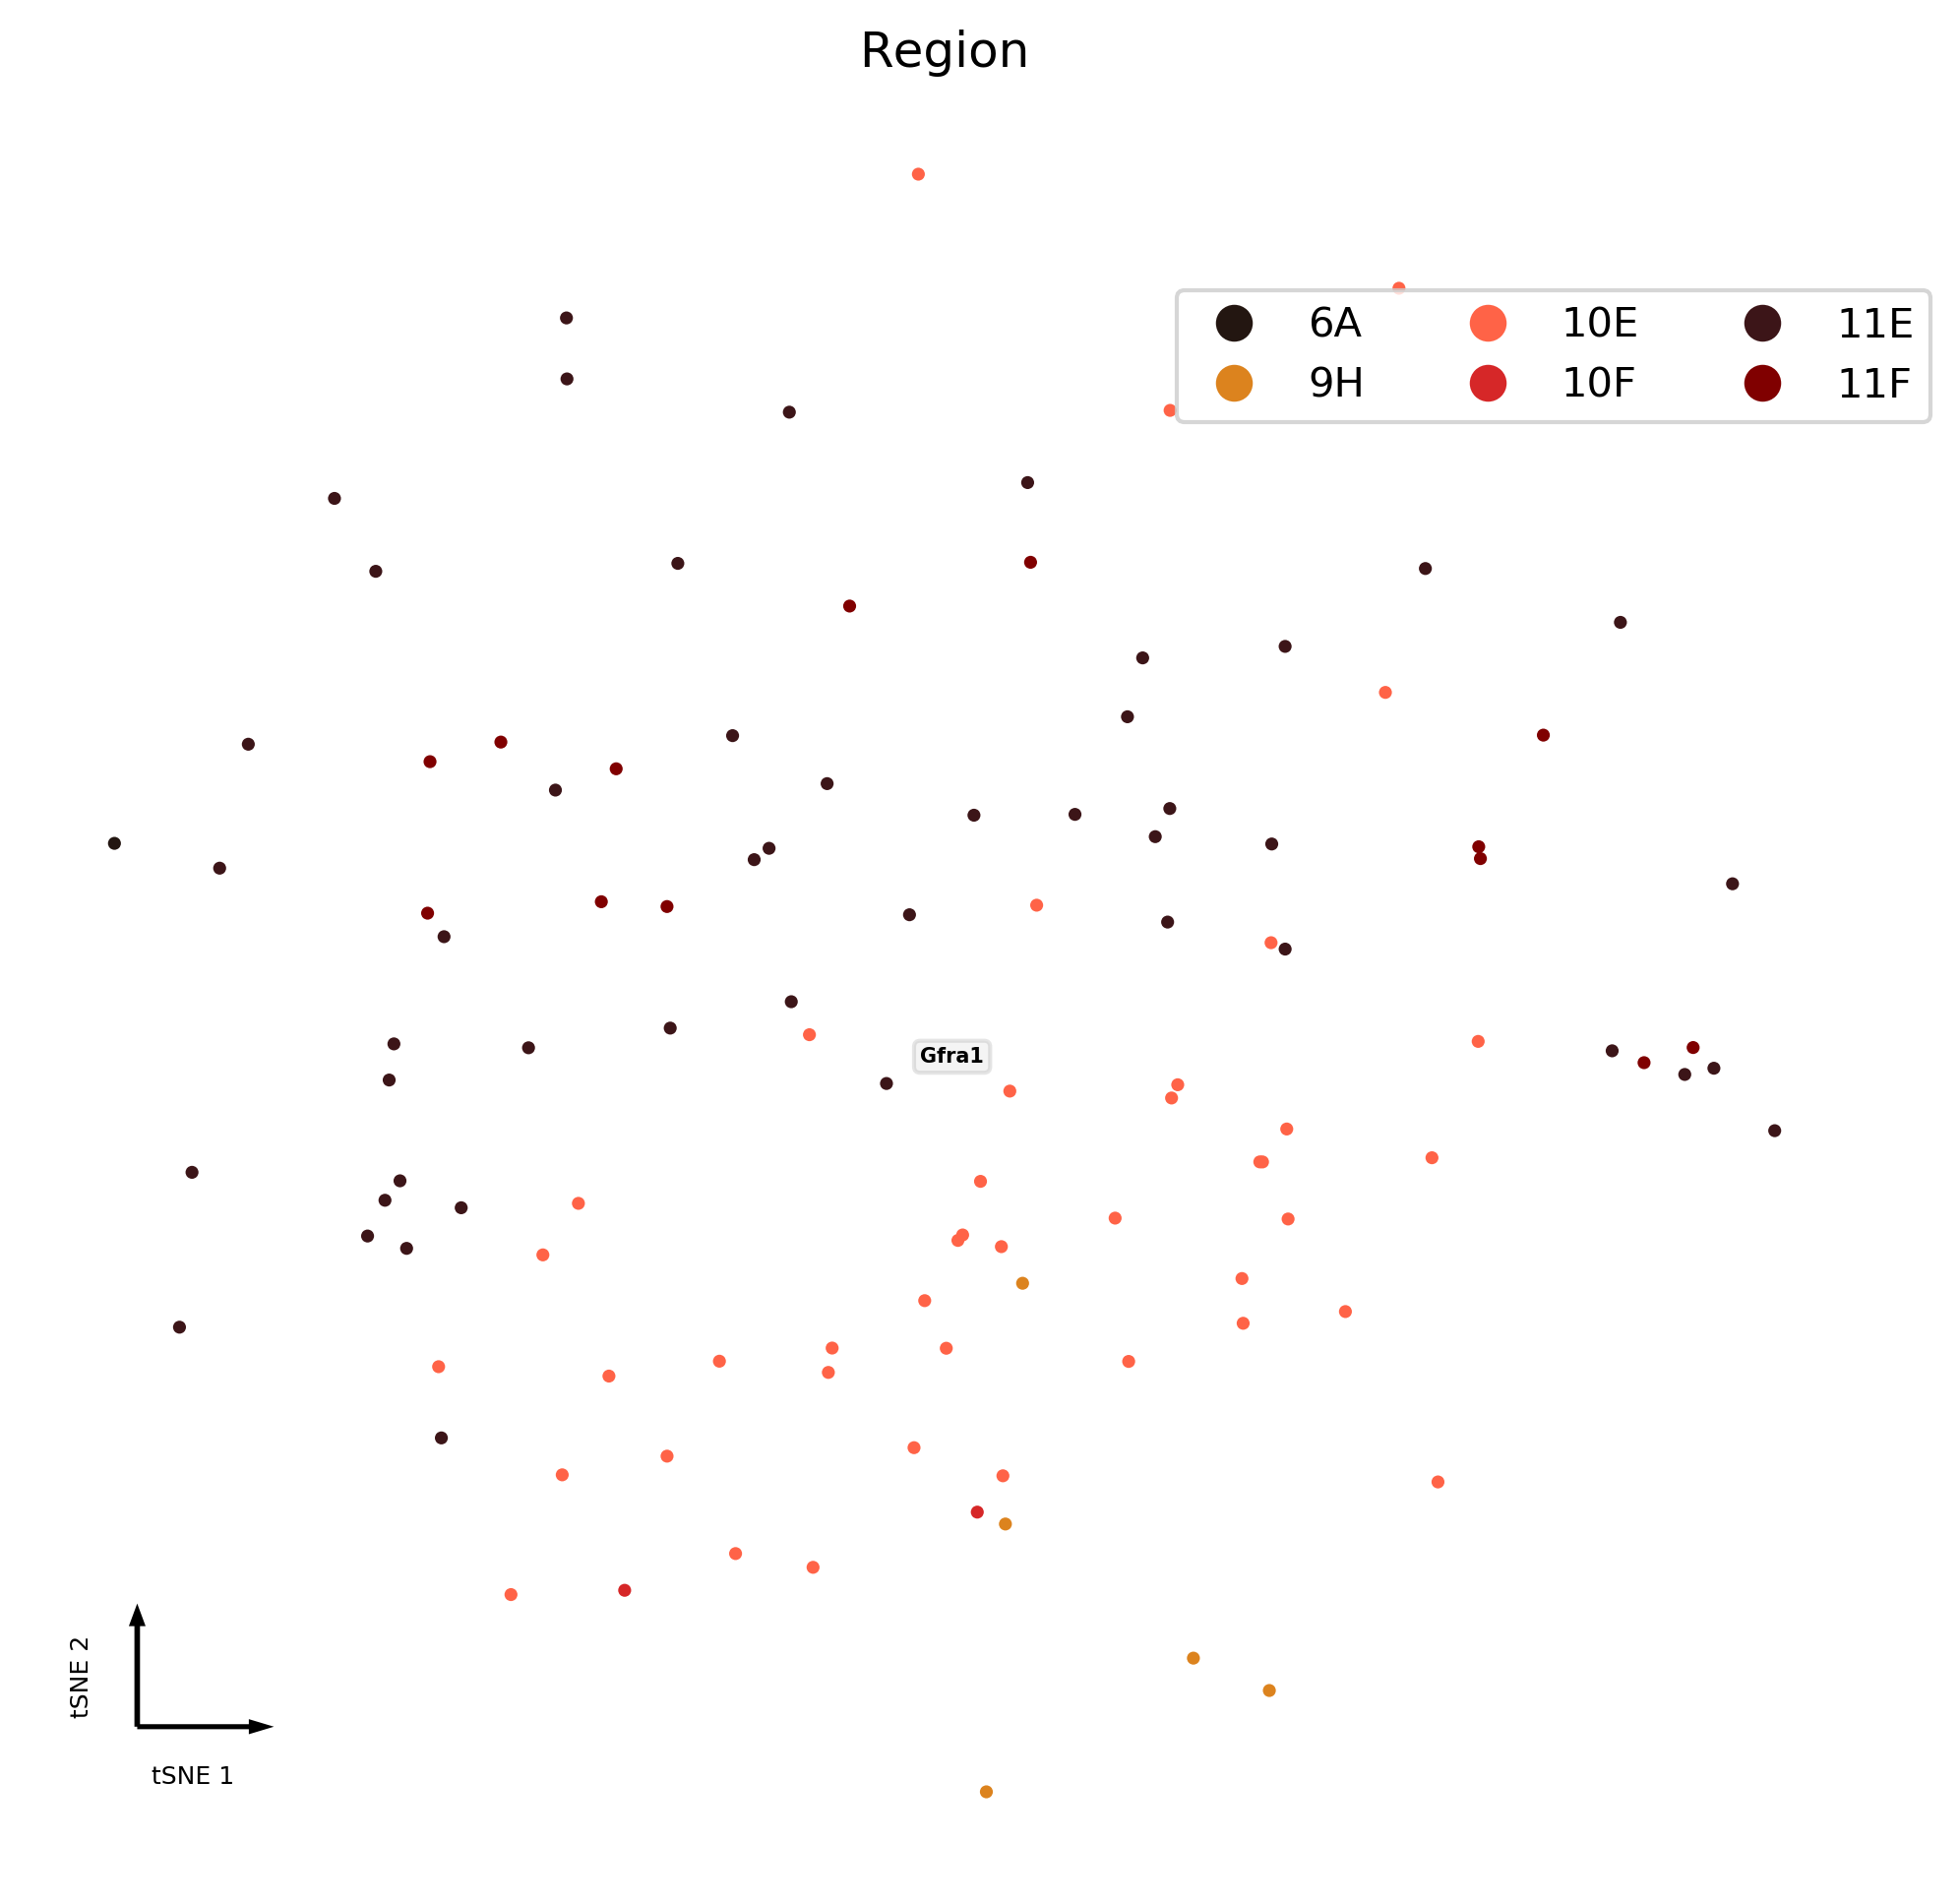

In [17]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
categorical_scatter(cell_meta, 
                    ax, 
                    coord_base=coords, 
                    hue='Region',
                    text_anno=cluster_col_name,
                    palette=region_palette,
                    show_legend=True,
                    scatter_kws=dict(s=s),
                    text_anno_kws=dict(fontsize=5),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)),
                    max_points=None)
ax.set_title('Region')
fig.savefig(fig_dir / f'Region_{coords}.pdf', bbox_inches='tight')

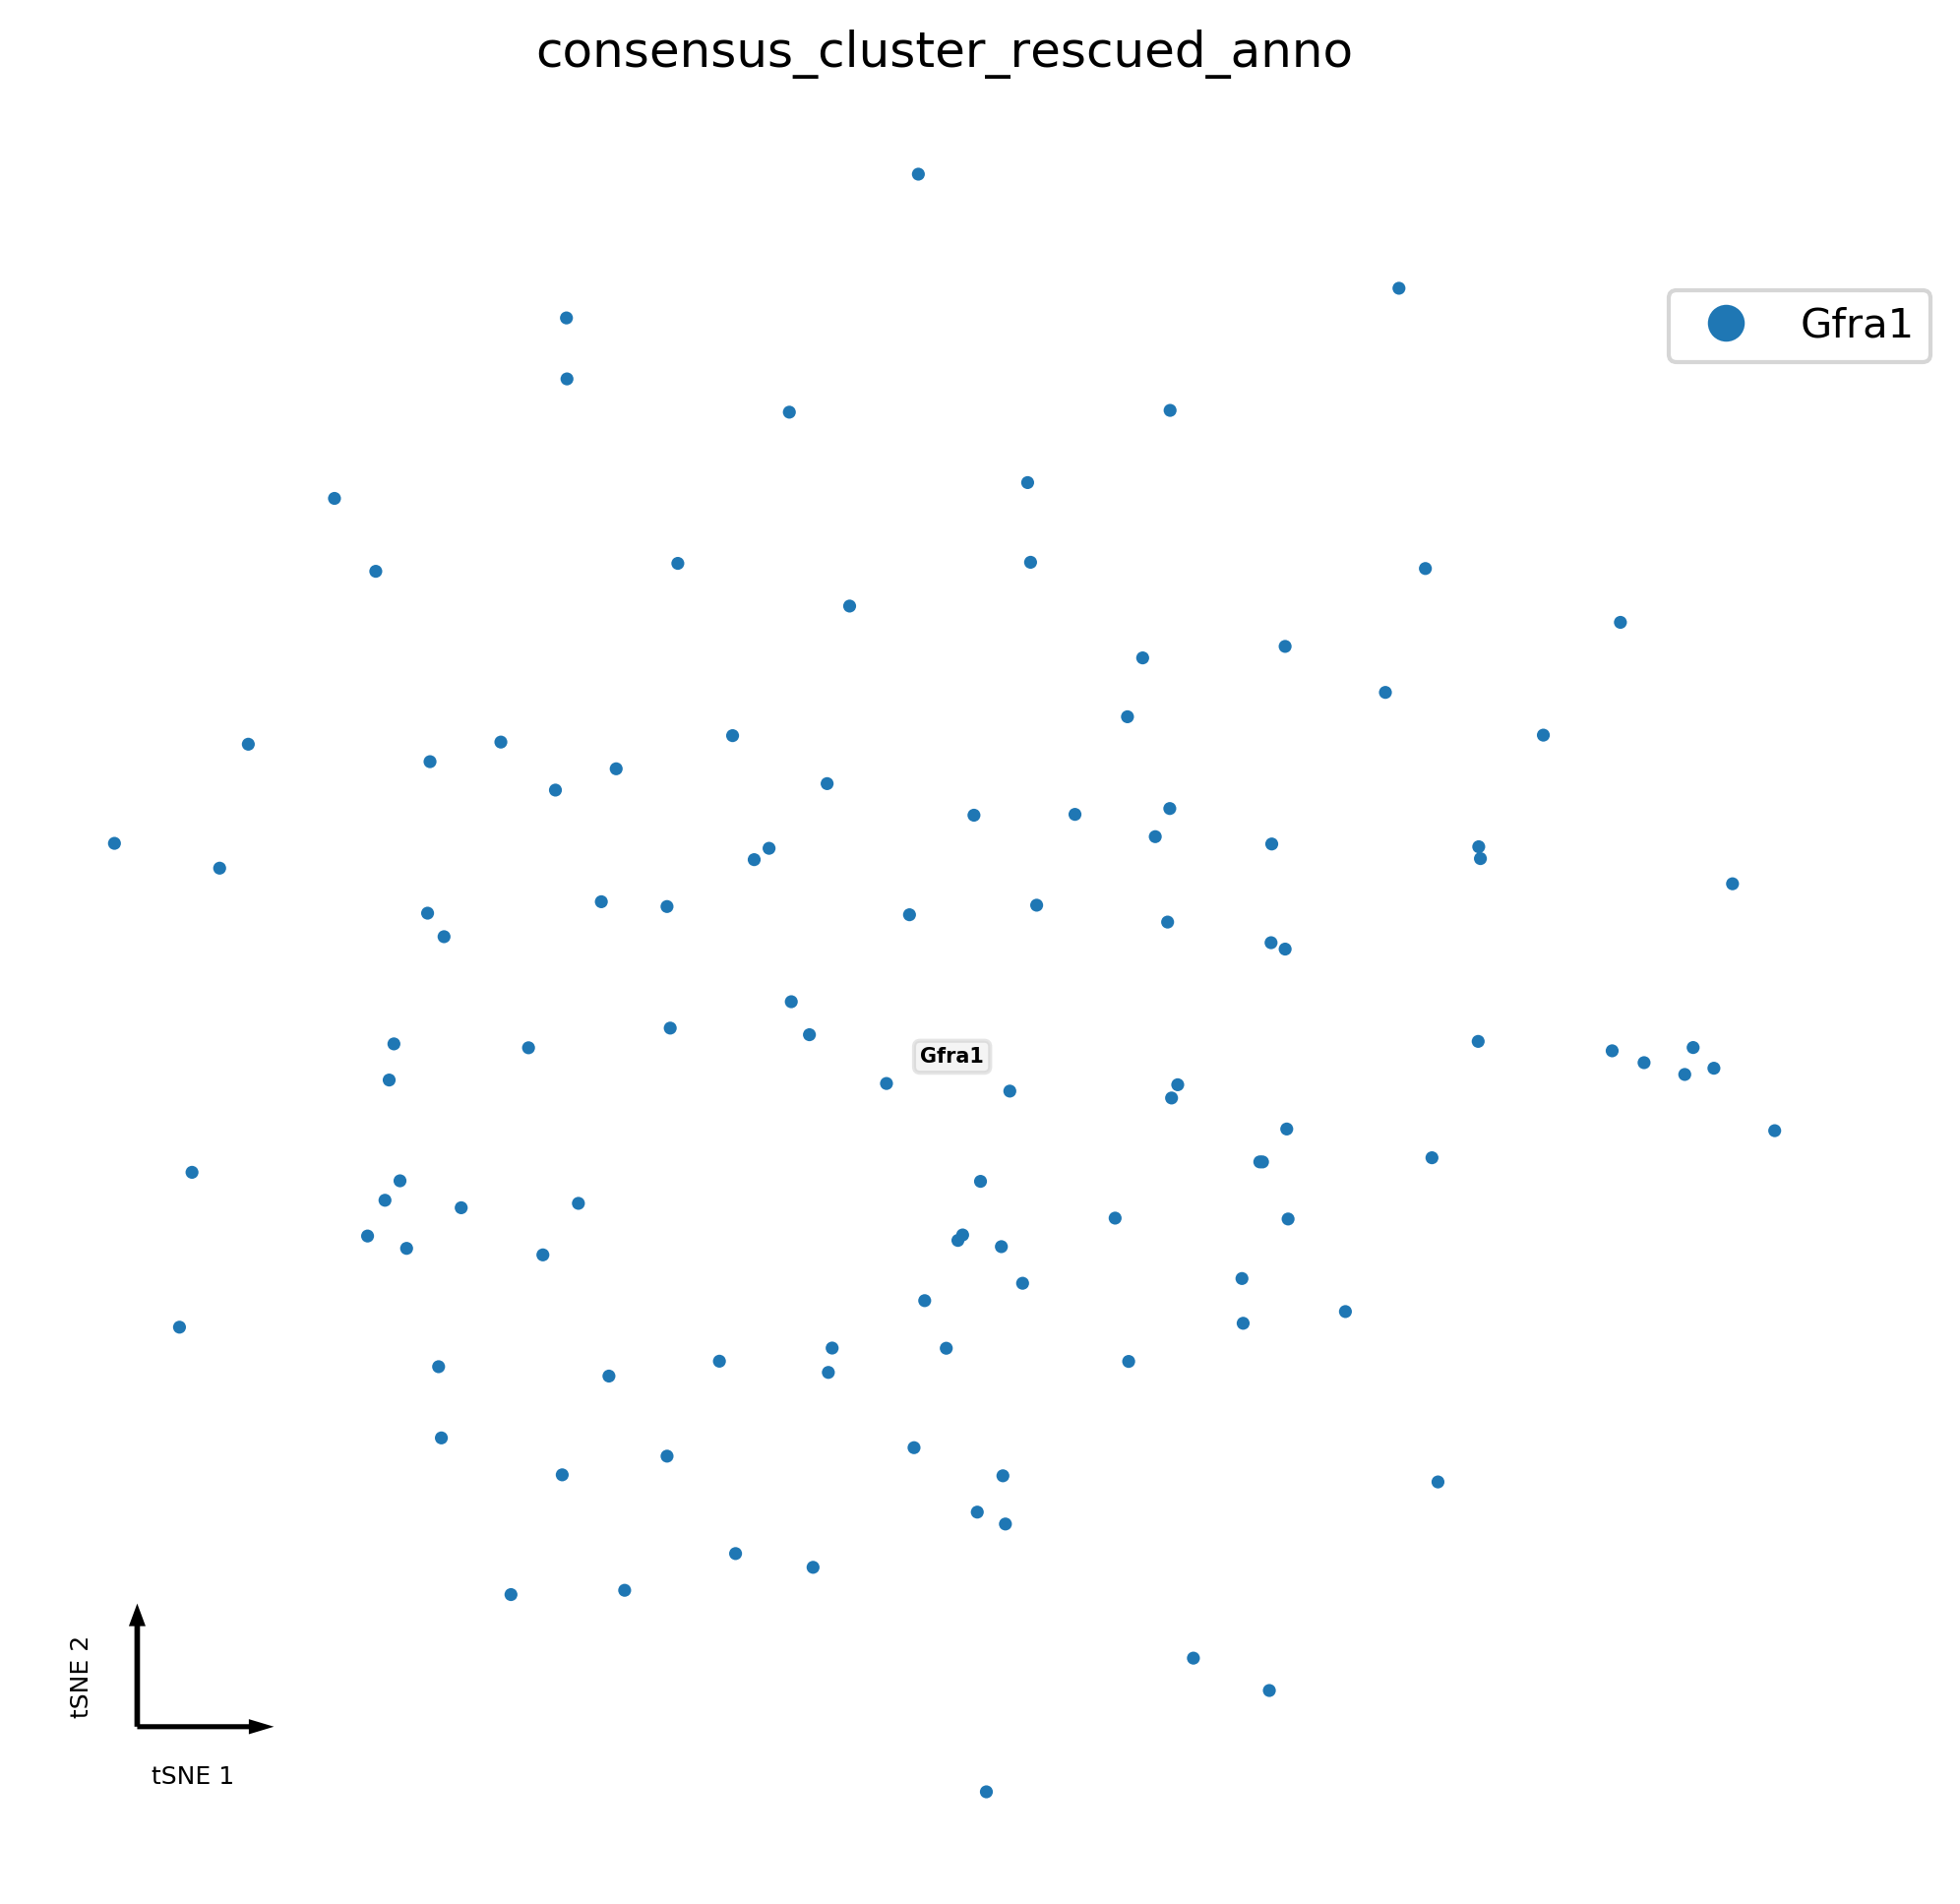

In [18]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
categorical_scatter(cell_meta, 
                    ax, 
                    coord_base=coords, 
                    hue=cluster_col_name,
                    text_anno=cluster_col_name,
                    palette=level_one_palette(cell_meta[cluster_col_name]),
                    show_legend=True,
                    scatter_kws=dict(s=s),
                    text_anno_kws=dict(fontsize=5),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)),
                    max_points=None)
ax.set_title(cluster_col_name)
fig.savefig(fig_dir / f'{cluster_col_name}_{coords}.pdf', bbox_inches='tight')

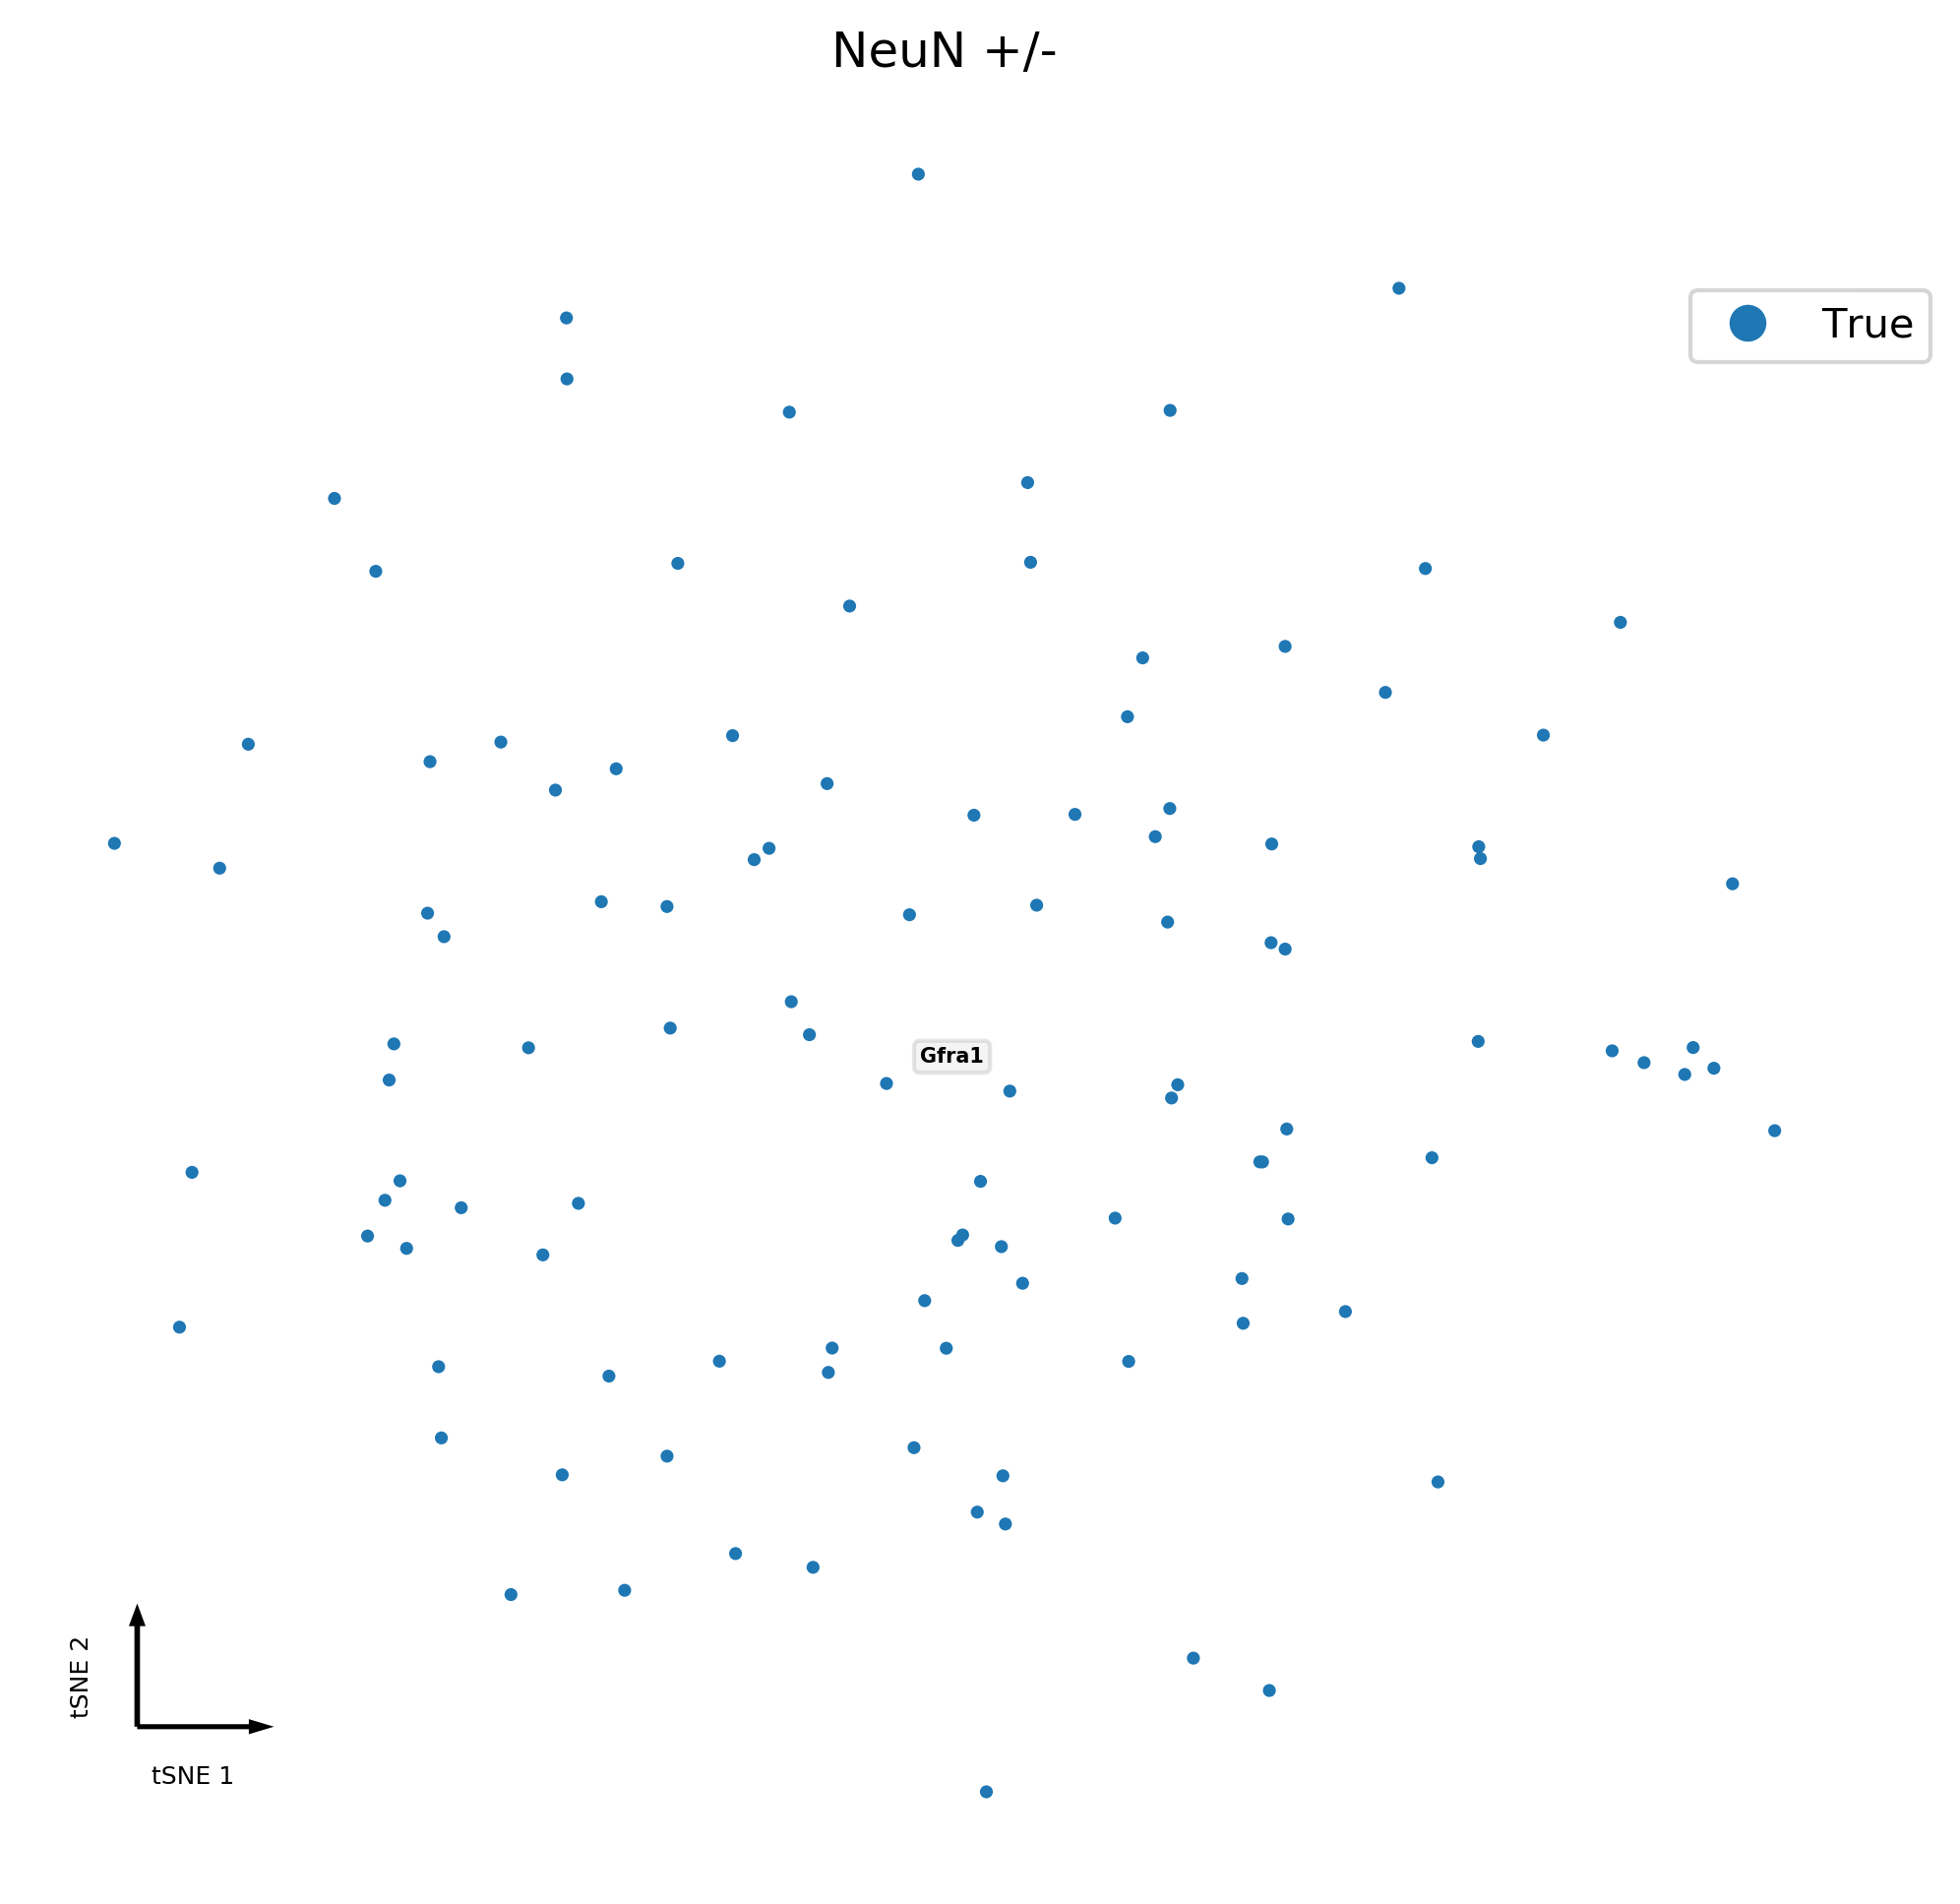

In [19]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
categorical_scatter(cell_meta, 
                    ax, 
                    coord_base=coords, 
                    hue=(cell_meta['Col96'] != 11),
                    text_anno=cluster_col_name,
                    palette='tab10',
                    show_legend=True,
                    scatter_kws=dict(s=s),
                    text_anno_kws=dict(fontsize=5),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)),
                    max_points=None)
ax.set_title('NeuN +/-')

fig.savefig(fig_dir / f'MeuN_{coords}.pdf', bbox_inches='tight')